In [2]:
import pandas as pd
import gc
import time,datetime
import matplotlib.pyplot as plt

In [3]:
def datetime2SecondsFrom1970(timeDateStr:str):
    time1=datetime.datetime.strptime(timeDateStr,"%Y-%m-%d %H:%M:%S")
    secondsFrom1970=time.mktime(time1.timetuple())
    return secondsFrom1970

def seconds2Datetime(seconds_from_1970):
    timeArray = time.localtime(seconds_from_1970)#1970秒数
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    datetime1=datetime.datetime.strptime(otherStyleTime, "%Y-%m-%d %H:%M:%S")
    return str(datetime1)

# datetime2SecondsFrom1970('2019-02-16 22:59:27')
# seconds2Datetime(totalExposureLog['ad_request_time'].min())

## ad_operation

In [10]:
ad_operation=pd.read_csv("../Data/A_preliminary/testA/ad_operation.dat",header=None,sep='\t',
                        names=['ad_id','create_time','operation_type','alter_field','value_alter'])
ad_operation.head(50)

,ad_id,create_time,operation_type,alter_field,value_alter
0,593323,0,2,2,90
1,593323,0,2,3,all
2,593323,0,2,4,"281474976710655,281474976710655,28147497671065..."
3,593323,20190217000000,1,1,0
4,593323,20190218233855,1,2,90
5,593323,20190218000000,1,1,1
6,593323,20190230000000,1,1,0
7,593323,20190301000000,1,1,1
8,146563,0,2,2,40
9,146563,0,2,3,"age:217,202,837,602,935,942,638,287,5,394,536,..."


In [33]:
print(ad_operation[(ad_operation['create_time']>0)&
                   (ad_operation['create_time']<20190319235959)&
                   (ad_operation['operation_type']==1)&(ad_operation['alter_field']!=1)]
      .groupby(['ad_id'])['create_time'].aggregate(["max",'min','size']).reset_index())

        ad_id             max             min  size
0          32  20190319053126  20190221053131    15
1          69  20190306053604  20190225053524     6
2          84  20190309053935  20190308054006     2
3         168  20190318105238  20190318105238     1
4         180  20190319053651  20190317180226     4
5         193  20190307054646  20190307054646     1
6         235  20190310054124  20190223220631     7
7         260  20190307053140  20190305053140     3
8         297  20190224220752  20190224220752     1
9         305  20190223221053  20190223221053     2
10        323  20190302012346  20190302012346     1
11        332  20190314053626  20190302222947    11
12        387  20190302054058  20190228230247     2
13        394  20190319000705  20190306053928    15
14        399  20190305003747  20190305003747     1
15        410  20190224002242  20190224002242     1
16        415  20190305120718  20190218232711     2
17        437  20190218001024  20190218001024     1
18        49

In [30]:
ad_operation['value_alter'][(ad_operation['ad_id']==2155 )&(ad_operation['operation_type']==1)&(ad_operation['alter_field']!=1)]  

710360                                                  140
710362    age:217,601,202,942,638,394,347,731,739,393,36...
710363    age:217,601,202,942,638,394,347,731,739,393,36...
710366                                                  150
710367                                                  160
710368                                                  180
710369                                                  200
710370                                                  140
710371                                                  160
710372    age:217,601,202,942,638,394,347,731,739,393,36...
710373                                                  200
710374                                                  140
710375                                                  150
710376                                                  160
710377                                                  250
710378    age:217,601,202,942,638,394,347,731,739,393,36...
710379                                  

In [9]:
del ad_operation
gc.collect()

7

In [21]:
#生成测试文件中的广告id（旧的，在曝光日志中出现过的那部分）的操作日志
index_need_ad_id=ad_operation['ad_id']==test_sample['ad_id'][0]
print('start!!!!!')
for index,ad_id in enumerate(set(test_sample['ad_id'])):
    index_need_ad_id=index_need_ad_id | (ad_operation['ad_id']==ad_id)
#     print(index)
print('finished!!!!!')
ad_operation[index_need_ad_id].to_csv("../Data/A_preliminary_generate/test_sample_ad_id_ad_operation.csv",sep='\t',index=False,header=None)

start!!!!!
finished!!!!!


## ad_static_feature

In [29]:
ad_static_feature=pd.read_csv("../Data/A_preliminary/testA/ad_static_feature.out",header=None,sep='\t',
                             names=['ad_id','create_time','ad_account_id','commodity_id','commodity_type','ad_trades_id','ad_size',
                             ])
# ad_static_feature.head(50)

/home/zhangyier/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
len(set(ad_static_feature['ad_id'][ad_static_feature['create_time']<1553011199.0]))

638044

In [32]:
datetime2SecondsFrom1970('2019-03-19 23:59:59')

1553011199.0

In [22]:
del ad_static_feature
gc.collect()

0

In [42]:
print(len(set(ad_operation['ad_id'])),len(set(ad_static_feature['ad_id'])))
print(seconds2Datetime(ad_static_feature['create_time'].min()),seconds2Datetime(ad_static_feature['create_time'].max()))
print(len(set(test_sample['ad_id'])&set(ad_static_feature['ad_id'])),len(set(test_sample['ad_id'])))

38843 735911
1970-01-01 08:00:00 2019-03-25 21:49:28
1949 1954


In [18]:
df_account_ad_num=pd.value_counts(ad_static_feature['ad_account_id'])
print(df_account_ad_num.shape)
df_account_ad_num=df_account_ad_num[df_account_ad_num>1]
print(df_account_ad_num.shape)
# fig = plt.figure(figsize=(16,9))
# ax = fig.add_subplot(111)
# ax.bar(range(df_account_ad_num.shape[0]),df_account_ad_num,align='center', alpha=0.4)
# plt.show()

(29737,)
(23249,)


In [48]:
#生成测试文件中的广告id（旧的，在曝光日志中出现过的那部分）的广告静态日志文件
index_need_ad_id=ad_static_feature['ad_id']==test_sample['ad_id'][0]
print('start!!!!!')
for index,ad_id in enumerate(set(test_sample['ad_id'])):
    index_need_ad_id=index_need_ad_id | (ad_static_feature['ad_id']==ad_id)
print('finished!!!!!')
ad_static_feature[index_need_ad_id].to_csv("../Data/A_preliminary_generate/test_sample_ad_id_ad_static_feature.csv",
                                           sep='\t',index=False,header=None)

NameError: name 'ad_static_feature' is not defined

## test_samplt

In [4]:
test_sample=pd.read_csv("../Data/A_preliminary/testA/test_sample.dat",header=None,sep='\t',
                        names=['sample_id','ad_id','create_time','ad_size','ad_trades_id','commodity_type','commodity_id','ad_account_id',
                              'when_ad_put','audience_targeting','bid'])
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20290 entries, 0 to 20289
Data columns (total 11 columns):
sample_id             20290 non-null int64
ad_id                 20290 non-null int64
create_time           20290 non-null int64
ad_size               20290 non-null int64
ad_trades_id          20290 non-null int64
commodity_type        20290 non-null int64
commodity_id          20290 non-null int64
ad_account_id         20290 non-null int64
when_ad_put           20290 non-null object
audience_targeting    20290 non-null object
bid                   20290 non-null int64
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [49]:
# ad_static_feature_unique_account=pd.unique(ad_static_feature['ad_account_id'])
# test_sample_unique_account=pd.unique(test_sample['ad_account_id'])
# print(len(set(ad_static_feature['ad_account_id'])),len(set(test_sample['ad_account_id'])))
# len(set(ad_static_feature['ad_account_id'])&set(test_sample['ad_account_id']))
test_sample.head(50)

,sample_id,ad_id,create_time,ad_size,ad_trades_id,commodity_type,commodity_id,ad_account_id,when_ad_put,audience_targeting,bid
0,1,394352,1529648412,34,84,13,29663,26657,"281474976645120,281474976645120,28147497664512...","age:819,608,988,741,202,837,400,394,942,361,72...",120
1,2,585401,1553076190,40,221,1,-1,6262,"281474976579587,281474976579587,28147497657958...","age:819,433,479,741,229,347,522,79,753,601|edu...",42
2,3,419408,1553031394,30,122,13,32110,17436,"17592185782272,17592185782272,17592185782272,1...",all,6
3,4,405326,1553238836,64,136,1,-1,22359,"281474976694272,281474976694272,28147497669427...","age:333,1|gender:2|area:11505,1874,3790,4566,5...",181
4,5,578942,1541191585,34,12,13,6372,24082,"68719214592,68719214592,68719214592,6871921459...","age:819,608,988,741,202,837,400,394,942,361,72...",31
5,6,269774,1551671536,40,122,13,23440,18260,"17592184995840,17592184995840,17592184995840,1...",area:12041,49
6,7,416368,1545860225,34,84,13,1855,9609,"267386880,267386880,267386880,267386880,267386...","age:819,608,988,741,202,837,400,394,942,361,72...",113
7,8,574309,1545123661,14,25,1,-1,18556,"281474976706560,281474976706560,28147497670656...","age:608,988,202,837,5,400,394,714,972,942,361,...",34
8,9,142702,1545396851,1,50,1,-1,3408,"281474976710655,281474976710655,28147497671065...",all,358
9,10,255347,1552287142,40,122,13,6657,616,"281474976694272,281474976694272,28147497669427...",all,30


In [11]:
del test_sample
gc.collect()

295

## user_data

In [3]:
user_data=pd.read_csv("../Data/A_preliminary/testA/user_data",header=None,sep='\t',
                      names=['user_id','age','gender','area','status','education','consuption_ability','device','work','connection_type','behavior'])
user_data.head(50)

,user_id,age,area,status,education,consuption_ability,device,work,connection_type,behavior
624218,753,2,"523,7589,12527,9019,14605,13489,302,6222,14214...",0,6,1,2,0,4,"32612,34406,3413,33059,4275,4667,4561,34051,42..."
271475,601,3,"9019,9032,663,12527,14532,2416,2599,1987,9687,...",13,7,2,2,0,2,"4990,4992,3413,33061,4115,4876,2393,34167,3441..."
44439,819,3,"12527,14188,9841,9019,14605,6222,9962,6643,172...",13,7,3,2,4,4,"3099,4403,34414,431,34415,5108,31686,3240,3229..."
863717,1,2,"12527,3435,2398,11069,1292,9019,14605,14348,62...",6,5,3,2,0,2,"34293,845,3413,3099,33061,33059,4120,4410,4415..."
1305469,714,3,"8928,9019,1540,719,12527,6051,10545,12118,7107...",13,5,3,2,0,2,"32612,34289,34406,3413,4275,4410,4561,34051,34..."
690515,731,2,"12610,12527,8057,3228,9019,14605,6222,5779,954...",13,2,2,2,2,4,"3970,5002,3099,4118,34057,2393,35740,20418,364..."
575658,202,2,"12527,2103,6436,11499,9019,14605,8333,6222,734...","9,5",5,3,2,0,4,"34289,4992,845,32773,3413,3099,33061,2393,3416..."
1375509,394,3,"12864,9983,5266,12527,12865,3435,9019,14605,65...",13,5,2,2,0,2,"34289,845,3413,4126,34172,12909,4876,34167,341..."
508963,105,3,"2681,12527,3228,9019,14605,1012,6222,5779,6643...",16,8,2,2,1,2,"34289,3413,4120,4876,34167,34414,34164,34416,4..."
350432,182,2,"13805,14326,12527,4153,9019,14605,6588,3404,62...",6,6,2,2,5,2,"32612,34406,32606,34293,3413,33066,33061,4275,..."


In [24]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396718 entries, 0 to 1396717
Data columns (total 11 columns):
0     1396718 non-null int64
1     1396718 non-null int64
2     1396718 non-null int64
3     1396718 non-null object
4     1396718 non-null object
5     1396718 non-null int64
6     1396718 non-null int64
7     1396718 non-null int64
8     1396718 non-null object
9     1396718 non-null int64
10    1396718 non-null object
dtypes: int64(7), object(4)
memory usage: 117.2+ MB


In [29]:
del user_data
gc.collect()

218

## totalExposureLog

In [4]:
totalExposureLog=pd.read_csv("../Data/A_preliminary/testA/totalExposureLog.out",header=None,sep='\t',
                             names=['request_id','ad_request_time','ad_position','user_id','exposure_ad_id','exposure_ad_size','bid','pctr',
                                    'quality_ecpm','total_ecpm'])
# totalExposureLog.head(50)

In [9]:
del totalExposureLog
gc.collect()

7

In [5]:
train_3_19_exposurelog=totalExposureLog[(totalExposureLog['ad_request_time']>1552924799) & 
                                        (totalExposureLog['ad_request_time']<1553011199)]

In [22]:
train_3_19_exposurelog.groupby(['exposure_ad_id','bid'])['request_id'].size().reset_index(name='Size')

,exposure_ad_id,bid,Size
0,30,7,2
1,30,12,1
2,30,16,1
3,30,19,2
4,30,20,2
5,30,22,2
6,30,23,1
7,30,25,1
8,30,26,1
9,30,27,2


In [47]:
pd.value_counts(train_3_19_exposurelog['bid'][train_3_19_exposurelog['exposure_ad_id']==466646])

36     177
40     172
35     172
39     167
47     164
45     152
43     152
41     152
37     146
44     145
53     145
34     143
30     143
31     142
33     142
29     141
51     141
46     141
49     141
48     137
32     137
38     136
26     136
54     136
50     133
55     131
42     126
52     125
60     124
25     122
      ... 
270      1
235      1
246      1
215      1
258      1
223      1
239      1
250      1
224      1
192      1
260      1
233      1
241      1
261      1
245      1
293      1
197      1
276      1
268      1
236      1
248      1
198      1
206      1
214      1
222      1
230      1
238      1
1        1
280      1
265      1
Name: bid, Length: 241, dtype: int64

In [6]:
train_3_19_exposurelog[train_3_19_exposurelog['exposure_ad_id']==586393]

,request_id,ad_request_time,ad_position,user_id,exposure_ad_id,exposure_ad_size,bid,pctr,quality_ecpm,total_ecpm


In [8]:
totalExposureLog[totalExposureLog['exposure_ad_id']==613207]

,request_id,ad_request_time,ad_position,user_id,exposure_ad_id,exposure_ad_size,bid,pctr,quality_ecpm,total_ecpm


In [74]:
value_count_ad_id=pd.value_counts(train_3_19_exposurelog['exposure_ad_id'])
value_count_ad_id
print(value_count_ad_id.shape)
stat_exposure_num_distribute=pd.value_counts(value_count_ad_id)
stat_exposure_num_distribute

(66104,)


1       9575
2       5832
3       4401
4       3398
5       2852
6       2465
7       2162
8       2049
9       1806
10      1759
11      1458
12      1316
13      1161
14      1122
15      1033
16       888
17       872
18       814
20       716
19       699
21       603
22       572
24       517
23       516
26       478
25       459
27       421
28       396
30       391
29       373
        ... 
619        1
683        1
811        1
1067       1
1493       1
1323       1
1963       1
2027       1
4119       1
2102       1
1876       1
1109       1
1621       1
554        1
3159       1
698        1
762        1
890        1
6100       1
1558       1
1238       1
1046       1
1813       1
662        1
2647       1
2455       1
2667       1
1082       1
4345       1
1919       1
Name: exposure_ad_id, Length: 1192, dtype: int64

In [64]:
for ad_id in value_count_ad_id.index:
    print(ad_id,ad_operation[ad_operation['ad_id']==ad_id].shape[0])

466646 0
320379 0
329869 0
484803 49
12711 0
127083 0
66654 0
643007 38
131581 0
9482 0
270265 0
126938 0
33726 0
269637 0
357483 0
649886 0
265502 0
637515 0
601069 0
163331 0
340335 0
322787 0
704404 0
101905 0
592377 0
81439 0
556884 0
600347 0
539391 0
72529 0
249599 0
146196 7
469776 0
533745 0
610432 0
560607 0
79483 0
608986 0
598865 0
130691 0
310949 0
94408 0
151915 0
281598 0
10872 0
197143 0
219392 0
545672 0
209662 0
609931 0
627922 0
62628 0
195834 0
523713 0
347960 0
87787 0
306923 45
474127 0
698194 0
111794 0
285368 0
315296 4
494446 0
251983 0
349796 0
558709 0
721413 0
331663 0
363742 0
682609 0
713420 0
193756 0
288450 0
229341 0
358862 0
518279 0
555371 0
188563 0
630461 0
82360 0
297604 0
195597 0
159750 6
315493 0
271143 0
446255 0
668948 0
378176 0
135336 0
405231 0
433999 8
176188 0
323648 0
306947 8
132187 0
205790 0
640759 0
568498 0
156685 0
109285 0
110955 0
417590 58
331848 0
564215 0
684049 0
590933 0
519362 0
65560 0
728090 0
56663 0
3610 0
681697 0
69662

602282 0
505931 0
152840 0
47830 0
1182 0
489074 0
15708 0
558913 0
574631 0
683785 0
159136 0
296269 4
479958 0
261234 0
276639 0
651147 0
41904 0
340079 0
655358 0
365456 0
569419 0
640357 0
16720 0
123528 0
140267 0
514614 0
297097 0
245639 0
120080 0
545078 0
236341 5
189402 0
515846 0
505165 0
264337 0
506106 0
594449 0
210257 0
505129 0
340304 0
423793 0
720564 0
239012 0
213973 0
175168 0
669157 0
284791 0
249203 8
657946 0
251604 0
474922 0
484421 0
128266 0
628017 0
553496 0
171932 0
417216 0
182167 0
465679 0
94604 0
457712 0
699863 0
566627 0
540350 0
649017 0
317129 0
58196 0
735763 8
465493 0
324254 0
21876 0
400539 0
668816 0
612849 0
320286 0
108011 0
408598 0
167875 0
366223 0
456949 0
654230 0
665682 0
211257 0
195435 0
592984 0
534499 0
522166 0
11891 0
35867 0
404000 0
406640 0
9262 5
502030 0
282585 0
595571 0
295746 0
211026 0
280513 0
270223 0
116798 0
456286 0
327828 0
418945 0
505981 0
722730 0
33024 0
635505 0
22763 0
385927 0
135165 0
594475 0
576417 0
424252 

234294 0
536992 0
468037 0
446865 0
562568 0
317267 0
699830 0
48811 0
704760 0
316423 0
360674 0
24161 0
358006 0
415157 0
492897 0
7692 0
436746 0
254044 0
728318 0
722764 0
723601 0
653425 0
534403 0
645025 0
304878 0
521702 0
125533 0
46155 0
57723 0
206902 0
212169 0
116113 0
458678 0
416433 0
534017 0
426014 0
682280 0
25455 0
96100 0
262848 0
79676 0
298038 0
89776 0
212577 0
204312 0
539251 0
369830 0
10414 0
46134 0
143487 6
430371 12
253661 0
200838 0
249734 0
733389 0
349480 0
358706 0
304032 0
556428 0
69982 0
320356 0
100533 0
305146 0
133835 0
14306 0
569519 0
535775 0
329144 0
192939 0
115065 0
644409 0
360648 0
724800 0
314781 0
169898 0
534077 0
665921 0
34531 0
135743 0
181708 0
254141 0
532077 0
487094 0
379748 0
98796 0
532203 0
554028 0
33547 0
28259 0
288934 0
225498 0
667865 0
227058 0
675373 0
369050 0
20890 0
213688 0
318538 0
278934 0
127463 0
58256 0
17590 0
308064 0
289321 0
595723 0
667686 0
186268 0
249943 0
481071 0
335486 0
470470 0
288224 0
191313 0
333

266351 0
387712 0
295931 17
375144 0
78160 4
357899 0
719890 0
687550 0
547877 0
470901 0
716643 0
665780 0
278936 4
238168 0
78122 0
186600 0
101172 0
654912 0
174758 0
733533 0
99959 0
675752 0
53813 0
347253 0
693702 0
341565 0
602299 0
256328 0
261586 0
48864 0
594855 0
564265 0
423170 0
134380 0
434252 0
435410 0
104119 0
230370 0
681453 0
233890 0
675663 0
391947 0
266279 0
194394 0
279285 0
507502 0
67461 0
468992 0
197386 0
161227 0
27538 0
667155 0
547001 0
492701 0
440780 0
596199 0
641919 0
209981 0
389312 0
247893 0
675264 0
728997 0
539386 0
417799 0
346707 0
109815 0
250188 0
706347 0
235284 0
574471 0
503307 0
613556 0
210063 0
144527 0
204053 0
157973 0
165940 0
139586 0
598578 0
303675 0
104845 0
672139 0
184794 0
256182 0
122777 0
393708 0
572189 0
290982 0
51072 3
634824 0
375839 0
53769 0
103697 0
192333 0
546859 0
334928 0
634304 0
521337 0
509892 0
292450 0
449319 0
622155 0
246295 0
365635 0
99136 5
564666 0
230740 0
34387 0
604705 0
198503 0
574981 0
606447 0
81

322767 0
151925 0
325487 0
579386 0
702293 0
233921 0
731319 0
485309 0
167756 0
290414 0
545454 0
160905 0
54716 0
570591 0
434408 0
342147 0
10638 0
487886 0
269643 0
728254 0
215727 12
249225 0
515571 0
696387 0
33664 0
57717 0
564056 0
391842 0
480058 0
146187 0
166589 0
420038 5
586670 0
310180 0
418663 0
110901 0
496712 0
606945 0
139172 19
651505 0
75906 0
515210 0
457401 0
559348 0
728493 0
681700 0
531181 0
266737 0
492730 0
32241 33
236728 0
654157 0
42478 0
254341 0
360392 0
451634 0
336762 0
294522 0
240143 0
635607 0
659703 0
39313 0
278697 0
450688 0
408614 0
564971 0
233087 0
463487 0
446340 0
421942 0
460326 0
559165 0
94447 0
45867 0
9747 0
550275 0
687077 0
258530 0
94229 0
130568 0
601300 0
285311 0
621729 0
314980 0
540172 0
407970 0
317990 24
372498 0
247741 0
137133 0
439923 0
230705 0
194242 0
686203 0
664555 17
585027 0
396308 0
242976 0
325088 0
321088 0
194802 4
239450 0
364466 0
270282 0
385314 0
214181 0
387141 0
28891 0
87600 0
85384 5
601078 0
631219 0
547

646456 0
185545 18
304199 0
605089 0
218857 0
583058 0
364956 0
661572 0
47577 0
560387 0
710000 0
520344 0
478518 0
559800 0
147793 0
35752 0
617596 0
109461 6
709800 0
583209 0
102043 0
692328 0
134802 4
65226 0
254957 0
325871 0
73583 0
170481 0
110796 0
399125 0
371488 0
589325 0
547074 0
617579 0
540025 0
309766 0
249632 0
225567 0
528331 0
323875 0
45762 0
178116 0
417483 0
2769 0
499554 0
23299 0
435552 0
215185 0
65259 46
458994 0
672923 0
44792 0
394936 0
433920 0
180255 0
435262 0
88963 0
722326 0
606272 0
641991 0
160314 0
132635 0
265034 0
189887 0
176350 0
308411 0
708640 54
437098 0
448591 0
589265 0
735034 0
543907 0
152701 0
411358 0
456580 0
375673 0
164469 0
227389 0
117561 0
152632 0
352136 0
43073 0
455957 0
267453 0
508937 0
679824 0
375212 0
231383 0
515686 0
68781 6
502232 0
531037 9
332057 0
459173 0
544539 0
421645 0
673553 5
20137 11
141469 0
306263 0
537741 0
507751 0
374618 0
558273 0
119075 0
620819 0
460547 0
271290 0
100944 0
364724 0
493374 0
411704 0
46

643917 0
77572 0
578017 0
66795 0
409294 0
141859 0
55913 0
206106 0
188795 0
315915 6
422201 0
549944 0
339623 0
141591 0
614699 0
688526 0
322585 0
574396 0
528814 0
559769 0
255615 0
91423 0
97796 0
261111 0
339472 0
551859 0
277923 13
517094 0
333802 0
381464 0
681863 0
353082 0
220687 0
554136 0
124712 0
546747 0
255806 0
676748 0
223262 0
302898 35
567961 0
96521 0
655379 0
426645 0
25907 0
442764 0
332975 0
359412 0
77336 0
225588 0
594642 0
507044 0
516513 0
370841 0
457842 0
25337 0
70140 0
438337 0
421782 0
593407 0
211391 0
489325 0
450206 0
139884 30
546794 0
135172 0
679914 0
232084 0
545969 0
360972 0
377291 0
269853 0
529010 0
411866 0
100638 0
272117 0
96788 0
251469 0
363733 0
604634 0
612781 0
368592 0
485677 0
695095 0
137224 0
171240 0
406108 0
623423 0
564502 0
568792 31
12389 23
576874 0
134113 0
59224 0
166231 0
224663 0
402704 0
466621 0
675722 0
296221 0
475825 0
155961 0
264745 0
380523 0
42043 0
76358 0
434340 0
720530 0
581401 0
405447 0
125608 0
205002 0
13

411324 0
299304 0
234376 0
576581 0
689555 0
277036 0
20073 0
459838 0
280767 0
522755 0
136763 0
209820 0
542177 0
649301 0
354773 0
379462 0
275725 8
614021 0
607345 0
471561 0
23910 0
550305 0
4420 0
729977 0
38271 0
492602 0
668958 0
731851 0
54596 0
588448 0
270888 0
19318 0
695232 5
413019 0
650053 0
688382 0
649570 41
423149 0
435045 13
626772 0
323854 0
75326 0
486927 0
120646 0
49519 0
314288 0
20927 0
506783 0
650719 0
433782 0
513627 0
163006 0
490189 0
241023 0
241088 0
488833 0
39147 0
174957 0
203924 0
86060 0
644919 0
224017 7
154487 0
552169 0
348256 0
551139 0
622670 0
528876 0
286331 0
546978 0
86773 0
263811 0
475891 0
264413 0
318118 0
548584 0
615865 0
513459 0
701996 0
330807 0
630892 0
391297 0
579936 0
675077 0
669018 0
216240 0
148673 6
285359 0
632850 0
50871 0
370757 0
451821 5
638567 0
283328 0
585828 0
336212 0
547926 0
483822 0
340654 0
215793 0
505060 0
185118 0
108413 0
372434 0
540678 0
305983 12
718173 0
101031 0
446201 0
710601 0
380422 0
81605 0
5533

368477 0
263142 0
218371 0
654362 0
31291 0
350048 0
671052 0
286538 0
596785 0
559566 0
694853 6
515546 0
336766 0
697387 0
117997 0
85524 0
55106 0
564868 0
33021 0
516153 4
648223 0
603589 0
645845 0
711246 0
13775 0
375189 0
619792 7
683324 22
165434 0
705095 0
594440 0
635226 0
480119 0
539285 0
75618 0
361782 0
256752 0
718935 0
320798 0
563962 0
160764 0
661389 0
28359 0
730517 0
295821 0
470260 0
424797 18
82933 0
525196 0
288979 0
398035 0
95456 0
388530 0
146772 0
354700 0
309318 5
280557 8
446947 0
194473 0
374458 0
23090 0
496804 0
263934 0
474637 0
677653 0
384571 34
280024 0
650591 0
535235 6
561959 0
313182 0
312316 0
405743 0
338918 0
59467 0
100272 0
146639 0
507951 0
247413 0
499907 0
113478 0
565643 0
132668 0
498048 0
398469 0
6779 21
102807 0
492679 0
542690 0
578167 0
663997 0
708876 17
384551 0
622374 0
382222 0
64291 0
87371 0
157320 12
651878 0
216882 0
691250 0
648626 0
599784 0
135314 0
133003 0
524430 0
358126 0
224034 0
100051 0
35108 0
504258 0
300677 0
55

129999 0
27275 0
262306 1
662773 0
170710 0
389657 0
132518 21
703325 0
610603 10
316933 0
361975 0
579868 0
351831 12
523695 0
691382 67
169008 0
468670 0
224006 0
47986 0
102950 0
522838 0
555803 0
214675 0
294133 0
353226 0
640105 0
522289 0
709811 0
711209 0
582429 0
381129 7
332123 0
598696 20
691165 0
460324 0
272631 0
429740 0
288162 14
537224 0
542378 0
636255 0
482168 54
57848 0
402685 0
48659 0
422337 0
446131 0
461084 0
414276 4
135581 0
344439 0
372527 0
714951 0
118979 0
249 0
613897 0
130655 0
569194 0
16163 0
29020 0
59494 0
115260 0
208277 0
203807 0
593731 0
28561 0
686406 0
155176 0
360710 0
367408 0
210238 0
248638 0
231418 0
593832 0
51798 0
679152 5
387029 0
167543 11
340727 0
135802 0
369959 0
347792 0
35586 0
17179 0
596756 0
657273 0
61759 0
325212 0
304410 0
492925 0
111077 14
489247 0
448073 0
485816 0
382883 0
156037 0
606126 0
214640 0
727026 0
60558 0
552931 0
81789 0
682374 0
320119 0
149793 0
668969 0
176446 0
696709 0
243348 0
362043 0
328068 0
520173 0


570758 0
217368 0
535657 0
210918 0
43544 0
582922 0
138515 0
313211 0
333341 0
390848 0
94028 0
452675 0
537264 0
217694 0
460985 0
669896 0
331262 0
287868 0
532012 0
312725 0
469291 0
430785 0
82791 0
305010 0
520233 0
210565 0
712486 0
144664 0
527705 19
547808 0
65080 0
466305 0
528968 0
150272 0
616810 0
314723 0
670238 0
491266 0
251267 0
333446 0
121727 0
655046 0
408053 0
198085 6
58010 0
2191 0
654303 0
502543 0
214709 0
160127 0
573391 10
648874 0
56026 12
455313 0
180442 0
399074 0
396881 0
198787 0
164498 0
702107 0
259342 0
533106 0
200476 0
189229 0
75043 0
287029 0
349337 0
717723 0
707429 0
602773 0
660016 0
90312 0
221721 0
142925 0
128966 0
122737 0
161556 0
154241 0
84890 0
29770 0
178750 0
121881 0
238059 0
146647 0
276010 0
582895 0
500748 0
15387 0
637385 0
608833 0
570329 4
361402 0
451101 0
627214 0
148167 0
685656 0
313081 0
612056 0
720148 0
648006 0
398132 0
570787 0
256492 12
349868 0
358229 0
58397 0
23159 36
371408 0
266996 0
545027 0
393100 0
83987 0
201

554477 0
147081 0
255250 0
191548 0
136824 0
81224 0
457292 0
582707 0
387539 0
575513 0
460053 0
526179 0
145921 0
230206 0
19270 4
391269 0
56476 0
312141 0
428428 0
181131 0
53335 0
376369 0
662524 0
77176 63
367459 0
645867 0
319868 0
587426 0
256811 6
6437 10
592740 0
576195 0
66771 0
445884 0
280656 0
370276 21
591887 0
37229 0
138175 0
433888 0
434253 0
605546 0
729734 0
213246 0
104734 0
236340 0
722937 0
669617 0
297174 0
139783 0
198563 0
258165 0
717474 6
646641 11
616686 0
196317 0
91153 0
615201 0
201929 0
19876 0
571922 0
76936 0
313985 49
10485 0
4632 0
519357 0
479190 0
399786 0
596873 0
371164 0
222275 0
116537 0
129569 29
329756 0
100722 0
505628 10
649209 0
86240 0
81628 0
208696 0
202559 0
178852 0
714805 0
582639 0
714007 0
16922 0
110442 0
219866 0
699666 0
274130 0
408704 0
448834 6
541446 0
56760 0
571133 0
217745 0
462194 0
704996 0
685412 0
309359 0
128445 0
530977 0
41782 0
607602 0
262056 0
370531 0
94169 0
497611 30
163150 0
564644 0
609651 0
398309 0
30930

500266 0
710705 0
480231 0
423934 0
575956 0
105985 0
523254 0
678277 4
434904 0
152486 0
115686 0
665496 0
517239 0
263267 0
358911 0
728611 0
623699 0
49599 0
395885 0
463785 0
411271 0
100213 0
281449 0
439558 0
332878 0
557073 0
612718 0
407544 0
58920 0
13282 0
618219 0
383049 4
577921 0
640957 4
53788 0
126805 0
318831 0
65004 0
410410 0
295793 0
98589 0
319632 0
1895 0
506469 8
612120 0
727459 0
627909 0
669992 6
172991 0
131069 0
277621 1
196038 0
729200 0
15434 0
36611 0
234274 0
520557 0
54408 0
212960 0
187232 0
649038 0
631457 4
469714 0
374434 9
29688 17
563546 0
566689 0
611910 0
731987 0
652012 0
441932 0
711183 0
20375 0
359576 0
44832 0
26500 0
534997 0
627399 8
188039 0
661839 0
75531 0
341751 0
403599 0
528975 0
237802 0
239967 0
602146 0
10005 0
611059 0
113165 0
637243 0
160452 0
274451 0
708846 0
463788 0
383510 0
734197 0
680515 0
181878 0
595869 11
666456 0
540777 0
217429 10
134342 0
409225 0
91797 0
560109 0
139609 0
354467 0
514303 0
203370 0
123494 0
479661 

526274 0
182964 0
79683 0
355587 0
446073 0
405488 0
22225 6
593562 0
245583 0
726656 0
130091 0
314286 0
146515 0
535105 0
655517 0
665176 0
723827 0
690896 0
22765 0
446158 0
519338 0
613277 0
712862 0
552732 0
240469 0
713917 0
669893 0
577844 0
524156 0
450538 0
231063 0
410024 0
182531 0
693572 0
393691 49
12781 0
338647 0
310777 0
348039 0
144107 0
330451 0
383872 0
524647 11
296568 0
473676 0
139370 9
362463 0
438390 32
531810 16
595779 0
427617 0
220808 0
254548 0
583406 0
578631 0
329835 0
74036 0
307494 0
730043 0
336886 0
399237 0
676641 0
511645 0
63770 0
698665 0
140589 0
264595 0
617573 0
92097 0
469909 0
46606 0
216802 0
602003 0
526145 0
579908 0
625188 0
591470 0
316337 0
1665 0
682007 0
473228 0
525236 0
306463 0
191492 0
275793 0
102854 0
168988 0
367324 0
307565 0
35116 0
602109 0
694820 6
547265 0
726227 0
557881 0
250341 0
620623 0
665804 0
37122 7
213118 0
462016 93
74390 9
478408 0
497906 0
523449 0
104396 17
99799 0
242437 0
144099 0
47795 0
132521 0
698586 0
1

720662 0
680168 0
16078 0
589484 0
216422 0
567594 0
477241 0
362026 0
504209 0
486517 0
345349 0
359567 0
192729 0
493497 0
549465 0
636565 0
304934 0
169673 0
279348 0
8118 0
637860 0
480456 0
555172 0
641107 0
279072 5
682270 0
39070 0
359997 0
572642 0
668157 0
134996 0
130391 0
501372 0
722215 0
709309 0
115316 0
287471 0
137683 0
526629 8
685095 0
110060 17
124036 0
187823 0
646398 0
721757 0
231528 0
191454 0
226960 0
156948 0
656038 3
288046 0
112337 0
496900 46
521125 0
262860 0
304357 0
501513 0
581697 0
285903 0
125475 0
196237 0
260690 0
226186 0
581049 0
622708 0
250964 0
500914 0
38360 0
512302 0
594631 0
241291 14
186068 0
341517 0
88945 0
693630 0
617930 0
182200 0
380838 0
135607 0
509030 0
399710 0
216804 64
487718 0
39854 6
496441 0
520974 0
303913 0
469537 15
132369 0
669917 0
148355 0
531757 0
482324 0
227916 0
359651 0
718729 0
87426 0
416497 0
72130 0
372135 0
371095 0
204968 0
428630 0
727896 0
270481 0
454365 0
421839 0
130005 0
319150 0
314684 0
392020 0
48126

472542 0
619182 0
25584 0
590940 0
709434 0
384795 0
680651 0
352626 0
46881 0
210089 0
224891 0
310710 0
275173 0
420892 0
9107 0
425463 0
26112 0
31964 0
636643 0
347037 0
687989 0
172022 0
32445 0
574100 0
171588 0
664047 0
590511 0
642704 0
294309 0
331978 0
592902 0
76676 0
346411 0
471839 40
385050 0
392591 0
530747 0
519986 0
52067 0
15652 0
713841 0
387200 0
45981 0
65282 0
266991 6
57534 0
71994 0
278523 0
166042 0
416283 0
381743 0
261099 0
576166 0
469748 0
524661 0
142021 0
704570 0
538483 0
358778 0
140069 0
714559 0
243712 0
177178 0
350286 0
267892 0
214850 0
57683 0
668984 0
623998 0
633310 0
178187 28
668057 0
631640 0
192727 0
196546 0
301323 0
444805 0
644074 0
705352 0
445846 0
579247 0
299208 0
230822 0
175613 0
79222 0
434270 11
11808 0
718923 0
50749 0
327886 0
722496 0
251357 0
448009 0
484660 0
135671 0
427952 0
430617 0
44855 0
160437 0
124481 6
649435 0
556980 0
343758 0
411243 0
727315 0
570549 0
313800 0
105590 0
137282 0
728250 0
400015 0
712848 0
264575 0

247324 0
450574 0
716452 0
453223 0
185056 0
573003 0
586952 0
591691 0
231741 0
26448 0
82150 7
450143 0
458797 0
687037 0
665039 0
172184 0
164439 0
322088 0
500907 0
516617 0
554883 0
427151 0
587751 0
26349 0
84346 0
229477 0
609080 0
652702 0
534595 0
249343 0
86337 0
10919 0
34 0
264122 0
533415 0
314748 0
692808 0
679175 0
76984 0
214578 0
678507 0
278132 0
35192 0
523541 0
537837 0
304617 0
709233 0
51381 0
654242 0
494875 0
428158 0
307844 0
91566 16
369559 49
618425 0
416745 0
436205 0
239813 0
573952 0
324489 0
681506 7
495513 0
346482 0
386396 0
315528 0
93624 0
694255 62
645201 0
675038 0
587749 0
383504 0
509456 0
423849 0
551431 0
321217 0
599473 0
87828 6
350296 0
367131 0
441669 0
398291 0
138706 0
677414 0
268619 0
50583 0
649062 0
545925 0
114391 0
114648 0
600477 0
257808 0
333100 12
118990 0
710251 0
633623 0
491792 0
650281 0
254496 0
541719 0
655109 0
633096 0
229282 0
239688 0
7162 0
448276 0
571070 0
539443 0
235223 0
578350 0
380524 9
266473 6
476927 0
296762 

249023 0
633667 0
310738 0
281623 0
310854 0
26052 0
183214 42
459770 0
378783 0
224028 0
502304 0
246617 0
370693 0
173428 6
595303 0
498923 13
146433 0
712689 0
169238 0
116257 0
266577 0
399965 0
545818 0
67463 0
155725 0
690488 0
445960 0
284401 0
581427 0
563771 0
505945 0
619015 0
440302 0
316532 0
124121 0
715110 0
606392 0
112419 0
149771 0
270064 0
390556 0
443947 0
243640 41
565688 0
334730 0
532200 0
589556 0
20105 0
628535 12
8795 0
575449 0
170630 0
109226 0
590465 0
700075 0
72380 0
174514 0
425176 0
467257 7
654103 15
247563 0
654524 0
145832 0
317302 0
385210 4
564767 0
688232 4
337189 0
332144 0
38972 0
84605 0
715797 0
182727 0
286949 0
9188 0
529884 0
14626 0
542624 0
184132 0
326144 0
566422 8
239644 0
265907 0
30180 0
174324 0
655682 0
47308 0
669721 0
255056 0
682525 0
524152 0
189552 0
605041 0
91030 0
121060 0
445017 0
308681 8
110945 0
449783 0
550405 0
624167 0
375766 0
699566 0
452064 0
543459 0
676727 0
378 0
52548 0
95603 0
490348 0
272741 0
714694 0
479095

395382 0
524337 0
209185 0
530971 0
29460 0
122768 0
161078 0
366538 0
146306 0
415022 4
192904 0
519085 21
440926 0
2746 10
690878 0
676253 0
266881 7
703918 0
528919 15
346243 0
684405 0
453873 0
227994 22
578629 0
249936 0
663601 0
2274 0
523317 0
583714 0
498305 0
142783 0
130982 0
40707 0
211884 0
73636 0
20347 23
280576 0
14209 0
248460 0
692290 0
365767 0
500071 0
460676 0
508173 19
82768 0
635708 0
446129 0
138297 0
207418 0
87479 0
228336 0
25759 0
546298 0
349664 0
708970 0
404150 0
576942 0
308946 0
653320 0
127670 0
549804 0
183557 0
467029 6
18809 0
427214 0
392689 0
343999 0
614549 0
645726 0
427408 25
438502 0
207264 0
482810 0
539098 0
685788 0
235896 0
206035 10
178260 0
674586 0
557672 59
379686 0
306315 0
696001 0
576506 0
475366 0
315635 0
530010 0
294642 0
353803 0
100680 0
106468 0
663370 0
443753 0
664227 0
454995 0
11310 0
2791 0
725553 0
397792 10
455710 0
557363 0
623905 0
271232 8
27579 0
485765 0
342784 0
117429 0
128910 0
533145 0
619776 0
368127 0
254509 0

579467 0
448129 0
34567 0
127361 0
28024 0
542599 0
667568 0
174993 0
152602 0
385699 0
184463 0
45593 0
227453 0
295976 0
640534 0
567895 0
308737 0
693533 0
306930 0
619842 0
283501 0
207004 0
83572 0
134151 0
698620 0
279186 0
643881 4
328155 0
155632 54
626976 0
566511 0
376039 0
408516 0
47499 0
574988 0
125824 0
421319 0
74299 0
417887 0
603225 0
366624 0
359742 0
614917 0
646658 4
270492 0
141816 0
214932 0
353189 0
419116 0
451541 0
228420 0
648156 0
251899 0
137394 0
163071 0
87629 14
44826 0
336170 0
139695 0
113211 0
107047 0
107287 0
567828 0
532306 0
619927 0
613544 0
151749 0
371637 0
190117 0
700581 0
138742 0
365633 0
246851 0
717264 0
603904 0
523075 0
623038 0
215798 0
334705 0
101593 0
581456 0
581050 0
699597 0
586508 0
189693 0
621000 0
395572 0
329013 0
148771 0
209525 0
50294 0
313756 0
584602 48
260839 0
408330 7
259300 6
689046 12
25358 0
516785 0
311815 0
700185 0
511979 0
456782 0
443029 0
610609 0
231561 0
374822 0
297649 0
452235 0
541397 0
341924 0
114319 

532736 0
100524 0
301847 0
365559 0
434161 0
610788 0
368290 0
2324 0
355482 0
394350 0
173746 0
146309 0
485531 0
452907 0
339015 0
151765 7
199887 0
108109 0
162761 0
685977 0
40695 0
296615 0
339351 0
415140 0
272215 0
300436 20
593174 0
295962 0
576654 0
217813 0
722593 0
570300 1
22774 0
177063 0
638692 0
447315 0
152385 0
689411 0
481323 0
334012 0
294559 0
297902 0
669937 0
536857 0
154053 11
686704 0
172174 0
555071 0
652554 0
437434 0
646307 0
101300 0
339776 0
276037 0
457867 0
308006 0
30756 0
660092 20
545938 0
107151 0
603597 0
209017 0
523918 12
536050 0
17945 0
326493 0
324376 0
197469 0
216649 0
212234 0
117553 0
641658 0
129137 6
389709 0
121527 0
341232 0
330924 0
45929 0
398936 0
278321 0
85533 0
299184 0
254600 0
3274 0
108961 0
55040 0
594417 0
579934 0
166346 0
503188 16
8089 0
675912 0
390471 0
421041 0
541199 0
67811 0
419089 0
623227 0
537867 0
453909 0
92971 0
554863 0
173178 0
275402 0
262235 0
222667 0
548908 0
566169 0
258698 0
282837 0
526829 31
33823 0
46

569624 0
86463 0
675720 0
711342 32
646915 0
516853 0
199778 0
731839 0
232005 0
29071 0
213910 0
223847 0
131542 0
636776 10
26695 0
6093 0
636455 0
716447 0
454321 0
597490 0
171148 0
682005 0
522033 0
19411 0
644815 0
624804 0
719205 0
12296 0
550649 0
160961 0
450710 0
641735 0
155524 6
405152 0
551171 0
74833 0
716206 0
679324 0
671935 0
604463 0
473884 0
492586 0
333329 0
519685 0
467774 0
575642 0
370622 0
25059 0
209968 0
540952 0
313194 0
676687 0
719192 0
423667 0
685388 0
389519 0
338177 0
708488 0
529223 0
22554 0
231520 0
590004 0
493248 0
678771 0
51499 0
703939 0
186873 0
690185 0
241542 0
567358 0
656843 0
697798 4
686341 0
552449 0
330590 24
23644 0
502135 0
27606 0
491696 0
382001 0
453003 0
258344 0
419518 0
476392 0
388677 0
733885 0
38998 0
328419 0
268462 0
63551 0
218716 0
187627 0
640289 0
645121 43
347896 0
716100 0
675195 0
375900 0
542154 8
332944 0
339821 0
496707 0
463054 0
9813 0
100149 0
730915 0
6105 46
651580 0
626784 0
535860 0
119872 0
365652 0
565157

616694 0
140092 0
450257 0
16541 0
673313 0
660027 0
92477 0
130502 61
143043 0
41409 0
412659 0
207644 0
399505 0
4720 0
340992 0
551281 0
130613 0
708601 0
156765 0
46209 0
585999 0
500096 0
446109 0
508722 0
348239 0
16427 0
79696 0
200550 0
245317 0
339783 0
337077 0
543019 0
247880 0
715020 0
1910 0
681074 0
100233 0
293539 0
52757 0
277131 0
493835 0
555996 0
351487 0
672597 0
108789 0
332259 0
87885 0
415920 0
709617 0
632380 0
142813 0
86801 0
620517 0
282387 0
59489 0
666185 0
189223 0
295913 0
116487 0
523664 0
172582 0
138562 0
705300 0
479124 0
395294 0
464913 6
417968 0
567536 0
640498 0
456159 0
171909 0
495872 0
407785 0
626750 0
261433 0
651441 0
49212 0
527917 0
261212 0
484715 0
132372 0
183565 0
133596 0
440575 0
256392 0
129825 0
71250 45
9175 0
593805 0
453324 0
250793 6
646971 0
349040 0
568745 0
609195 0
224409 0
426289 0
74861 0
277970 0
491645 0
51570 0
92068 0
530534 0
52405 0
492086 0
549678 0
159309 0
69402 0
147552 0
521740 0
257955 0
703445 0
93043 0
62318

319373 0
86739 0
210496 0
83870 31
89973 0
643035 0
251927 0
253175 0
216337 0
209279 0
462638 0
339609 0
216890 0
505031 0
110605 0
645012 0
517325 0
513108 0
199675 0
505168 0
686879 0
633875 0
706490 0
156629 0
619559 0
98683 0
310121 0
645758 0
157275 0
357118 0
523738 0
579722 0
109117 0
416317 0
187774 0
490250 0
517637 0
266237 0
583660 0
586289 0
8800 0
87297 0
280 0
314109 0
304707 0
431079 0
47853 0
454833 0
484003 0
37608 0
727993 0
530524 0
696665 9
151277 0
280317 0
425200 0
322632 31
117443 0
167658 0
546528 0
718082 0
61102 0
437953 0
450125 0
527759 45
565890 0
596764 0
444637 0
626051 0
392240 0
669074 0
551064 0
416202 0
552972 0
734282 0
328283 0
608582 0
456879 0
115448 0
81028 0
312939 0
28918 0
690340 0
611415 0
620939 41
290419 0
28314 0
27819 0
107171 0
30075 0
459509 0
722719 0
320564 0
166056 0
419769 14
70118 36
49628 0
19258 0
729672 0
124746 0
670142 0
13379 0
469385 0
42070 0
252351 0
436029 0
199420 0
208783 0
695337 56
241773 0
132328 0
667118 0
138247 0

673271 0
528673 0
250961 9
213728 0
64680 0
381942 0
345060 0
456194 8
48620 0
335359 0
693734 0
332785 0
294355 0
698881 0
365118 0
227166 0
248420 0
636184 0
622533 0
721980 0
317173 0
659143 47
33435 0
519702 0
626961 0
659449 0
693211 0
408893 0
161900 0
440387 0
576073 0
732746 6
343495 9
60243 0
119229 0
181486 0
697519 0
640195 0
624693 0
161492 0
99197 0
559150 0
196853 0
571410 0
254775 0
580914 0
535852 0
723508 0
11084 0
724302 0
357353 0
528005 30
340387 0
231729 0
256810 0
451271 0
371120 0
283834 0
646875 0
716477 0
410872 0
455976 3
545362 0
721926 0
355307 0
342071 0
125627 0
519381 0
128141 0
433403 25
71033 0
156241 0
387114 0
357041 0
727075 0
214420 0
205311 0
488996 0
340526 0
24914 0
593161 0
205901 0
575880 0
413504 0
80281 0
331683 0
96557 0
88930 0
469939 0
529853 0
182135 0
649083 0
556656 0
402110 0
364560 0
299360 0
535837 0
35098 0
133405 0
536998 0
24885 0
174023 0
249096 0
699331 0
173611 0
566065 0
664967 0
320186 0
521156 0
454898 0
256833 0
704042 0
38

353994 0
656801 0
306943 0
34362 0
60983 0
267362 4
599229 5
231313 0
499602 0
14052 0
593804 0
251236 0
491146 0
54583 0
212612 0
593337 0
206471 37
101981 0
284399 0
584957 0
108247 0
436041 0
19923 0
648209 0
474828 0
321077 0
157649 0
247003 0
184195 0
376219 0
485063 0
353664 3
216561 6
574939 0
368158 16
261715 0
274083 0
136770 0
552108 0
700272 0
603771 0
716664 0
679382 0
380185 0
368623 0
239017 0
712192 37
718341 0
79498 0
603137 0
691314 0
433851 0
693367 0
171768 0
417680 0
73220 0
454137 0
122727 0
356151 0
587576 0
292454 0
413231 0
527963 0
326717 0
443989 0
372369 0
5800 0
550696 0
40251 0
380897 0
563060 0
73596 0
290445 0
400669 13
225074 0
439869 0
427084 0
116121 0
532393 0
224836 0
214260 0
159702 0
69114 0
169741 0
255641 0
146872 0
701578 0
691727 0
498705 0
40944 0
368030 0
44567 0
642713 0
128664 0
628391 0
536437 0
118464 0
474854 0
337778 30
554943 4
318861 0
331453 0
52494 0
581307 0
708238 0
394854 0
283735 0
613989 0
556091 9
542431 0
247424 0
646797 8
62

407650 0
500932 0
526754 0
641434 0
413360 0
301638 0
344594 0
517630 0
298284 0
14024 6
17356 0
46248 8
602355 0
537564 0
145863 0
391457 17
100095 0
140864 0
547681 0
421639 0
89592 0
259449 0
2778 0
217601 0
439980 0
98458 0
465540 0
257719 0
45681 0
275841 0
320064 0
131644 0
398450 0
627986 0
290125 0
543427 0
551786 0
175686 0
268573 45
452872 40
302258 0
527553 0
10940 0
464177 0
100348 0
237301 0
144028 0
472820 0
87776 0
269648 0
444261 0
48861 0
333599 0
224930 0
551662 0
567063 0
511301 0
322849 0
65987 0
51711 0
681034 0
192725 0
307263 0
617420 11
51290 0
2098 0
148474 0
677004 0
729398 0
150755 0
244647 0
590232 0
208406 0
315725 36
208491 0
222977 0
234136 0
347579 0
684227 0
735955 0
558083 0
648150 0
505121 0
86190 0
653535 0
708254 0
387670 0
40903 0
505971 37
290559 43
107492 0
171968 0
422006 0
716845 0
578870 0
322025 0
669034 0
430951 0
481382 0
45731 0
484860 0
330494 0
549860 0
687589 0
375977 0
372696 0
102989 12
264403 0
508074 0
309960 0
101928 0
357823 0
733

351349 0
282711 0
121777 0
252202 0
139541 0
413909 0
418146 0
699649 0
551691 0
245863 0
58345 0
190732 0
569699 0
544406 0
519688 8
482846 0
374329 0
306596 0
341640 0
474757 0
103843 0
123829 0
703313 0
235299 18
480731 0
223683 0
408785 0
107428 0
107939 0
587704 0
183232 0
45967 0
311486 0
500589 0
228935 8
51995 0
427510 0
61760 0
644260 0
126679 0
8699 0
639078 0
220662 0
684395 0
371176 20
669212 0
111158 0
109688 0
391650 0
666292 0
385505 0
512223 0
195960 0
517473 0
460423 0
677730 0
451905 11
425878 0
401430 0
669061 0
692816 0
210240 6
214008 0
586190 0
459038 6
540101 11
621744 0
589379 0
94433 0
712199 0
66159 0
111259 0
300794 0
251987 27
351 0
29995 0
15261 0
40246 0
63808 0
124998 0
166158 0
458951 0
242143 0
74950 0
146597 0
608470 8
561680 0
327488 0
569996 0
592903 0
331646 0
233390 0
317376 0
103222 0
115876 0
548240 0
572812 0
534246 0
620423 0
154185 0
364647 0
351139 0
91722 0
264708 0
508912 54
72072 0
257069 0
37195 0
156606 0
348422 0
226422 0
416385 0
57742

130811 0
479344 0
121269 0
639985 0
463896 0
61840 0
706460 0
334441 0
194203 0
466785 0
1478 0
24961 0
426333 0
512561 0
370034 0
195220 0
238735 0
661710 0
256941 0
515575 0
322020 0
230781 0
418217 0
527969 0
632404 0
484686 0
689067 0
462147 8
200967 0
658145 0
271969 0
288173 0
76015 5
573906 4
427505 0
641989 0
565727 0
443769 0
356450 0
412503 0
705222 0
599673 0
275750 37
730308 0
335428 29
76506 0
530018 0
555694 24
286103 0
385497 0
407982 0
601665 0
489357 0
261083 0
211106 0
209566 0
322361 0
70362 0
152916 0
207814 0
419176 38
324199 0
411561 0
235796 0
169779 0
533664 0
682735 0
603719 0
428056 0
326138 0
681896 0
11557 0
377625 0
299507 0
659366 0
156624 0
594909 0
405404 0
722173 0
717402 0
364640 9
217399 0
682714 0
145557 0
641596 0
735985 0
282713 0
167689 0
273280 0
207030 0
562762 0
404830 0
713103 0
275741 0
292117 0
592564 0
282718 0
184078 0
601714 0
628325 20
142290 21
592569 0
301835 0
311368 0
500117 0
719455 0
236520 0
279432 0
206477 0
43226 0
318208 0
6148

699025 0
501853 12
313624 0
389436 0
520572 0
579286 0
560544 0
182374 0
518698 0
521724 0
324343 0
726483 0
82926 0
39312 0
414025 13
500933 0
732262 0
374650 0
517442 0
448830 0
694774 0
416525 0
222575 0
262744 0
49005 29
30327 0
441574 0
173957 11
341975 0
423871 0
371291 0
394494 0
330510 0
653285 0
584370 0
41551 0
6642 0
29976 6
430304 0
104280 0
596857 0
427461 0
543908 0
587887 0
234852 0
384978 0
337869 0
662253 0
131325 0
573861 0
341145 0
490304 0
186472 0
265257 0
114700 0
582464 0
22905 0
448609 0
15635 0
148828 0
190767 0
249197 0
390570 0
548990 0
110151 0
210621 0
58402 0
649295 0
83334 0
385804 0
99621 0
617409 0
634863 3
604156 0
734733 10
400751 0
32024 0
243910 0
171515 0
668767 0
109164 0
14942 0
528495 0
205373 0
491568 0
408117 0
495151 0
586935 0
261077 0
651469 0
15093 0
380152 0
395264 0
514897 0
643047 0
453166 10
491319 0
697086 0
511718 0
409915 8
380153 0
128297 0
189691 0
709376 0
726974 0
735098 0
494251 0
293054 0
630767 0
397436 0
313512 0
432777 0
61

282152 0
35201 0
502056 0
227055 0
111085 0
412930 0
441131 0
292164 0
51651 0
603950 0
63421 0
221165 0
727711 0
4771 13
10916 35
508040 0
428565 13
294262 0
491818 0
575697 0
256457 0
499520 0
155353 0
732604 0
454916 0
279082 1
135139 0
563418 0
588172 0
325846 4
106375 0
116620 0
100738 3
453672 0
131787 0
318047 0
587679 0
302881 0
595875 0
277058 0
477740 0
578437 14
555920 0
472898 0
534891 0
625945 0
131285 0
263682 0
196349 0
90712 0
383814 0
385564 23
654550 0
549050 0
73850 0
14770 0
428100 0
192156 0
480307 0
555735 0
241704 0
407808 0
162919 0
637347 0
622755 0
617363 0
689550 0
522873 0
567656 0
233484 0
63562 0
319235 0
471706 0
592113 0
158886 69
120746 0
470019 20
516880 0
443454 0
215769 0
434436 0
289067 0
554261 0
577460 0
669683 0
677706 0
383261 0
425237 0
572886 8
633057 0
703816 0
581986 0
351748 0
481149 4
68807 0
527808 12
420469 0
296260 0
29714 71
115110 0
403641 0
400601 0
85679 0
994 0
198240 0
392722 0
347205 0
436045 0
329967 0
148652 0
160908 0
637154 0

191800 0
262604 7
46990 0
196733 0
6143 0
331353 0
636221 0
171979 0
520158 0
718654 0
296075 0
502946 0
364821 0
152293 0
468667 0
341546 0
734208 0
107686 0
493719 0
390881 0
196550 0
548933 0
537884 0
659045 0
314033 0
107628 0
505356 0
256474 17
243197 0
261620 0
194142 0
357502 0
473672 0
156377 0
40230 0
641349 0
678174 8
632230 0
88460 0
612306 0
417279 0
367097 0
105252 0
50580 0
394809 0
401624 0
271997 67
563021 0
258679 0
615106 0
96201 0
250735 0
211757 0
204289 0
143865 0
258815 0
606328 16
591098 0
451534 0
372039 0
589802 0
11818 0
571657 0
551454 0
385306 0
636759 0
306787 0
434587 0
351641 0
272250 0
215931 0
503140 0
312943 33
678489 0
325169 0
240636 0
175259 0
119326 0
271501 0
226329 0
626312 0
315088 24
239233 0
46471 0
115633 0
282040 0
42806 0
102074 0
554784 0
320879 0
734480 0
498555 0
92514 16
671592 0
600018 0
513397 0
534041 0
672085 0
388901 0
635179 0
375203 0
279311 0
602979 0
561423 0
368427 0
164609 0
76745 0
547035 0
521737 0
60523 0
726097 0
405700 0

231908 0
382085 0
545444 0
331447 0
71409 0
719944 0
511888 12
486721 0
325467 0
158688 0
674160 0
506252 0
391633 0
474935 0
734612 0
217648 0
605417 0
302874 0
256399 0
442196 0
732639 0
570208 0
597389 21
263004 0
47731 0
728465 0
469384 0
4243 0
390420 0
411920 0
203981 0
82105 0
360907 0
109269 0
650703 0
243928 0
608088 0
376865 0
135842 0
71858 0
296672 0
462588 0
342810 0
179777 0
333065 0
576727 0
470181 0
366555 0
425689 0
250546 0
597231 0
641234 0
716128 10
117641 0
266051 0
580823 0
302665 0
66000 22
177729 0
696511 0
475992 0
446386 0
477584 0
582311 0
351517 0
672682 67
530762 0
678074 0
665217 0
191893 0
628931 11
420189 0
258316 0
295548 0
250120 0
681609 0
695217 0
234142 0
314947 0
617423 0
154279 0
693911 0
75247 0
585365 0
2201 5
34988 0
337617 0
673939 0
32185 0
256966 0
122859 11
712878 0
20544 0
19510 0
422444 0
480049 0
273003 0
486211 0
252996 0
562469 0
565348 0
260327 0
210126 0
711580 0
317608 0
83691 0
346995 0
678718 0
196397 0
522510 0
482864 0
664930 0


276944 0
635453 0
387775 0
639539 0
712629 0
478526 0
227789 0
5530 0
197332 0
517110 0
381624 0
282214 0
382512 0
661531 5
555094 0
330273 0
250147 0
67242 0
72054 8
478952 0
141895 0
726930 0
734398 0
101975 0
245266 0
566403 0
457436 0
447087 0
59934 32
563099 0
55031 0
390668 0
138789 0
685053 0
676422 0
320040 0
492539 0
317999 0
551006 0
733237 0
504146 0
82517 0
193357 0
67967 0
184860 38
316946 0
261712 0
273287 0
304462 0
252422 0
100918 0
136658 0
74338 0
332704 0
172570 0
14848 0
527504 0
216587 1
696230 0
555103 0
573510 0
1710 0
711517 0
142166 0
16711 68
271636 0
376500 0
80678 0
668243 0
143950 0
179766 3
535056 9
398275 0
503162 13
481966 0
494221 0
696331 0
306874 0
356014 0
326097 0
384525 0
208362 8
483012 0
607416 0
314076 0
262527 0
282344 0
182006 0
131922 0
268626 0
672760 0
160463 0
94591 0
128714 0
256635 38
135570 0
478189 0
504806 0
191067 0
439238 0
596081 0
434548 0
533655 0
470732 74
275983 0
302627 0
269599 0
411203 0
642832 0
44774 0
3765 0
498981 11
464

612041 4
618080 10
484847 0
421326 0
464792 0
229334 0
709053 0
193600 0
113933 0
356115 0
319471 0
88197 0
415604 0
480084 0
477184 0
75674 0
649577 0
691306 0
574724 0
480034 0
702131 0
167722 0
590429 0
515569 0
38963 0
161589 0
361644 0
710172 0
190436 0
584352 0
646504 0
499532 0
438064 0
416631 0
548112 0
229587 0
276683 0
209964 0
52307 32
447969 0
694939 0
224319 0
198706 0
488940 0
637207 0
38976 0
493584 0
293084 0
312293 0
715022 0
709043 0
399236 8
545059 0
466750 0
34908 0
290230 0
680357 0
577865 0
45931 0
599449 0
328939 0
183645 0
351188 25
165918 0
23498 0
65674 0
10062 0
27792 0
140297 0
66839 0
645881 0
311421 0
512889 0
504905 0
397422 0
74943 0
306589 0
520221 0
469860 0
523069 0
349602 0
601528 0
599059 0
279307 5
317420 0
519674 0
86117 0
202626 0
522120 0
555328 58
460805 42
687225 0
290922 0
532910 0
28653 0
391187 0
74936 0
146801 0
648615 27
192701 0
276429 0
78952 0
726750 0
269056 0
327918 0
346079 0
605496 0
52189 0
11201 0
112853 0
323556 0
328480 37
4101

72026 0
278586 0
724307 39
62197 0
41325 0
553964 48
346712 0
291577 0
68296 0
497150 0
432366 49
176016 5
226682 0
101258 0
597264 0
60843 9
669029 0
256645 0
73710 6
477569 0
599891 0
566463 0
243889 0
726217 0
66561 0
635276 0
194658 0
370262 0
543159 0
500559 0
363806 0
688305 11
723718 0
181365 0
601230 0
669862 0
411927 0
611461 0
507703 0
525483 0
247403 0
194042 0
295416 0
259434 0
510812 0
10299 0
607513 41
219050 0
609089 0
190757 0
32399 0
521977 0
357792 0
699874 0
286927 0
291576 0
538315 0
640386 0
630153 0
308855 0
449918 0
562487 5
222827 0
368316 0
201804 0
147102 0
516618 0
706488 0
71834 0
223271 0
29628 0
547864 0
317064 0
111620 0
359980 0
204469 0
634958 0
529572 0
580467 0
180533 0
189945 0
605930 0
368312 0
517337 0
488931 0
630514 0
585831 0
365720 0
46003 0
12229 0
47743 0
114940 0
48568 0
226517 0
551804 0
717548 0
696594 0
86721 0
608923 0
345218 0
374326 0
725281 0
296117 37
322021 0
225450 0
257980 28
91289 0
709716 0
290813 0
254365 0
722035 0
371856 0
59

655574 0
230315 0
291970 0
395607 0
109625 0
163544 0
23505 0
330082 0
440643 30
419010 0
335190 0
90559 0
543691 0
602876 0
508011 0
215023 0
679924 0
390475 0
717970 0
47829 0
386377 0
418872 0
13514 0
195229 0
516456 0
488738 0
453928 0
229394 0
519432 0
173208 0
316758 0
218278 0
386868 0
256935 0
423750 0
423135 0
302187 0
161206 0
485229 0
367163 0
385328 0
516908 0
130554 0
660921 0
716198 6
317633 0
223905 0
64729 0
530103 0
83182 0
234599 0
622234 13
364920 0
721835 0
243756 0
57472 0
76526 0
164568 0
380540 0
385329 0
230539 0
669837 0
486649 31
279107 0
381803 0
36564 0
34517 0
253363 4
169620 0
440604 0
517121 0
533697 8
406024 0
675727 0
631801 0
130809 0
245425 0
561551 0
677579 0
289602 8
29938 0
308057 0
16466 0
168409 0
364336 0
360493 0
528526 0
713152 0
107554 0
512567 0
388924 39
534937 0
420352 0
150965 0
624629 0
615914 46
465262 0
713684 0
299550 0
309028 0
286287 0
50827 0
497972 10
555415 0
438545 0
378634 0
376581 0
511232 0
724898 0
527608 0
145631 0
14021 0


716547 0
139590 0
402869 0
423326 0
714317 53
40706 14
385412 0
159563 90
609131 0
81253 0
487894 0
372807 0
25114 0
19608 0
507847 0
573490 0
112578 0
288918 0
700501 0
276636 0
581002 0
212791 0
675695 55
624151 29
582946 0
634568 0
95669 0
52528 33
99906 0
182896 0
109632 0
154590 0
405814 0
420497 0
520866 0
92687 0
78351 12
500206 0
88578 0
619594 0
276347 0
592965 0
731701 0
350367 9
671928 0
716802 0
716427 0
622430 0
580410 0
475417 0
534839 64
655889 5
672979 0
698884 0
296436 0
383306 0
481343 0
518185 0
133897 0
142093 0
558939 0
615985 0
592080 0
676575 0
471751 0
414443 0
466447 0
701730 0
700757 0
202059 0
623074 0
699441 0
665781 0
439530 0
314326 0
87816 0
513713 0
194116 0
569343 0
735789 13
568908 0
502714 0
14386 0
488658 0
197186 0
164366 0
54784 0
256607 0
405983 0
60298 0
115631 0
376675 0
706482 0
148542 0
363512 0
604282 0
331069 0
673074 54
67389 0
673437 9
190976 0
626548 10
565536 0
729144 0
573508 0
424838 0
352243 0
384134 0
340785 0
126306 0
52400 0
467936

453936 0
402454 0
327172 0
670544 0
162740 0
136927 14
124985 0
723298 0
378503 0
302647 0
2155 60
316491 0
343613 0
547621 0
587499 0
284183 0
651576 0
252517 0
525217 22
497904 0
65579 0
72790 0
172739 0
159776 0
49794 0
546625 0
163819 0
439482 0
711005 0
483553 0
509639 0
420219 0
301351 0
564918 0
731495 0
600888 0
487583 6
538894 0
478794 0
94174 0
608402 0
167348 0
265764 0
231875 0
142370 0
68154 0
171060 0
120473 0
560408 0
592770 0
672615 0
210631 0
226541 5
468126 0
250312 0
340251 0
41483 68
62578 0
141917 0
450341 0
366772 0
659763 0
397915 0
311536 0
687561 0
14887 0
471666 0
328251 34
304147 0
402016 0
117845 0
176115 0
723209 0
437419 0
199779 0
71303 0
276155 0
100742 0
124577 0
85603 0
263175 0
408647 0
301307 0
440672 0
670695 0
379062 0
18089 0
187077 0
272709 0
149019 0
314880 0
695283 0
134186 0
573656 0
191095 0
535928 0
199419 0
341507 0
712019 0
575868 0
435494 0
146481 0
583506 4
726291 0
129074 0
647486 0
307875 0
532376 0
349299 0
114741 0
458529 0
342875 0


188731 0
112880 0
173387 0
211909 0
535713 0
543182 54
623764 0
466439 12
240265 0
267879 9
143008 0
580049 0
330556 0
504329 0
433649 0
580795 0
403879 29
468920 0
636054 0
625809 0
489394 0
279017 0
161233 0
539640 0
392604 0
647740 9
256284 0
41178 0
130915 41
5860 0
45800 0
113353 0
201375 0
467835 0
658974 0
444861 0
544343 0
658975 0
212422 0
164814 16
514103 62
478537 0
384282 0
436105 0
78146 0
589892 0
158672 0
217748 0
347531 0
308858 0
533550 0
166742 0
51397 0
126665 0
559770 0
710152 0
54160 0
680541 0
519031 0
687230 0
70931 0
675773 0
733932 0
539797 0
379816 0
388492 0
315850 0
715136 0
539157 0
463282 0
725438 0
211131 0
252789 0
318347 0
579145 0
115636 0
43929 0
559646 54
323653 0
117558 0
241957 0
39112 0
320272 0
263055 0
591028 0
505764 0
676241 0
458812 0
335447 0
308646 0
222076 14
549406 0
461233 0
113598 0
351838 0
48967 0
300644 0
398832 0
202388 0
612452 0
544837 0
682585 0
640011 0
453011 0
154463 0
102780 0
281501 0
26947 0
468997 6
77226 0
495634 0
445278

700331 0
270789 0
187174 0
580155 0
630901 0
125766 0
131899 0
535608 0
191270 0
387005 0
442326 50
142790 0
28901 49
588388 0
626227 0
136032 0
654971 0
363826 14
414640 0
188249 0
685578 0
12522 22
346092 0
391162 0
689745 0
258366 0
620654 0
448561 0
302063 0
6947 0
298964 0
425866 0
160622 0
387997 0
555566 0
425290 0
312248 0
314789 0
707804 0
352327 0
424943 0
224745 0
184081 0
412992 0
250180 0
526816 0
467954 28
16127 0
227620 8
679430 0
683520 0
479648 0
491427 0
226169 0
357975 0
623284 0
128711 0
617129 0
616911 0
47887 0
539109 0
86834 0
164819 0
225056 0
392587 0
185306 0
146370 0
693789 0
619177 0
190653 0
226784 0
446871 0
36255 0
224606 0
19847 0
11139 0
591831 0
515587 0
271626 0
247606 0
155397 4
570968 0
109347 3
220646 7
195399 10
13189 24
425466 0
446521 0
98150 0
100727 0
148929 0
462852 0
610261 0
593885 0
75181 0
532479 0
485387 16
400194 5
206637 0
95510 0
115069 9
437596 52
1789 0
197600 0
408540 0
524214 0
169317 0
686088 0
315869 0
378970 33
293319 0
699094 

344270 0
36853 0
415597 0
237465 0
537071 0
381327 0
188924 0
368705 0
147721 0
406003 0
79745 0
124822 0
643420 0
605743 0
131161 0
635018 0
524646 0
145151 0
550451 0
690507 0
167767 0
53538 22
487453 8
444606 0
136967 0
57351 0
180049 0
258529 0
661163 0
489136 0
203099 0
608361 0
186723 0
670144 38
612255 0
626292 0
145150 0
265955 0
571299 0
141406 0
618088 0
196731 0
317545 0
184264 0
595632 0
417782 0
216631 0
68026 0
732919 15
26223 0
323602 0
302997 0
714728 0
243568 0
221037 0
680229 0
583717 0
622215 0
710887 0
667633 0
421668 0
556558 0
229162 0
233007 0
567037 0
228913 0
22965 0
135205 0
257566 0
421463 0
10492 35
223266 0
8209 0
65792 0
186410 5
2337 0
238023 0
88331 0
358280 19
405130 0
469218 0
26741 31
436434 0
114999 11
555794 0
221005 0
518117 0
217035 0
39196 0
135000 0
635691 0
255966 0
522737 0
593414 0
710304 0
47626 0
12827 9
4639 17
657721 0
90148 0
634746 0
727148 0
700718 0
186451 0
425961 0
53525 21
648865 0
200643 0
151059 0
270200 0
149847 0
410072 0
63501

561097 0
260151 0
215481 0
415859 0
591776 0
638959 0
598463 0
616886 0
519706 0
412039 11
80306 0
269941 65
679451 0
532372 0
628462 0
362606 0
691713 0
59313 0
448585 57
128712 0
387571 7
435976 0
237739 0
352318 0
423809 0
47490 0
528860 0
553204 0
657194 0
694470 0
724528 1
680153 0
439913 0
546815 0
332087 0
493789 4
383127 0
339838 0
98466 0
520348 25
668056 0
270057 0
704674 0
446868 0
590091 56
43333 14
666010 0
120848 0
567615 0
409136 0
245449 0
677527 0
55776 0
96167 0
653426 0
190583 0
67497 0
59042 0
317396 61
317688 0
607877 0
233560 0
12439 0
324051 0
548861 0
296780 0
512257 0
582014 0
663242 0
401262 0
147718 0
298505 0
89665 0
367102 0
293028 0
532885 0
220673 0
78007 0
248194 0
608359 0
409622 0
428285 0
491425 12
483521 0
119244 0
452848 0
493610 0
659921 0
608232 0
184449 0
507396 0
389103 0
59726 0
665778 46
43214 0
86201 0
292477 34
690178 0
202385 0
129481 0
381417 0
630721 0
393526 0
456264 0
133152 0
104681 0
112877 0
161468 0
567160 0
614008 0
665283 0
282184

652783 0
504442 0
477880 20
420508 0
511284 0
357411 0
275543 0
550226 0
490567 0
662813 0
34129 0
689422 0
465921 0
619390 0
547453 0
76516 0
119803 0
222624 0
365877 0
67052 0
103383 33
138497 0
52638 0
533635 14
699358 0
703383 0
303721 0
246315 0
728096 0
62029 0
56389 0
298265 8
123503 0
203837 6
314236 0
611556 0
581432 0
698913 0
535622 0
567095 0
68963 0
556347 0
494128 0
593309 0
636052 0
213562 0
174761 0
634641 0
173557 0
433911 0
525427 0
4892 0
621551 0
19223 0
517402 0
541530 0
604729 0
494979 0
672902 0
366017 0
147041 0
652528 0
543559 0
62459 0
457953 0
406076 0
213543 0
345335 0
551480 0
589625 0
443622 40
329172 0
27624 0
203683 0
366022 0
31607 0
19313 0
318049 0
463650 0
557673 0
174893 0
658087 0
365703 13
713813 0
665443 0
676931 0
285827 0
326630 0
107580 0
566253 0
584671 0
95310 0
47982 0
95504 0
729749 0
47770 0
351637 0
560577 0
29826 0
482205 0
662108 0
263616 0
213560 0
98912 0
485935 5
533763 0
685114 0
230447 0
614963 0
613799 5
35563 0
165105 0
447591 0

613595 0
355768 0
254536 0
482368 0
705688 12
549606 0
127889 0
681276 0
441374 0
227931 0
333470 0
322644 8
697636 0
156331 0
377969 0
500875 0
681214 0
447284 0
586298 0
498534 0
644143 0
365351 0
571955 55
333155 0
70414 0
544563 0
404650 0
171074 49
731888 0
290151 0
15798 0
629414 0
397841 0
699456 0
459600 0
461583 0
587557 0
612113 0
332401 28
320266 0
152707 0
425136 0
171387 0
627463 0
335243 0
393815 0
445289 0
468428 0
160903 0
597002 56
156633 0
72628 0
197254 0
586484 0
203769 0
29403 0
195525 0
734436 0
69150 0
144812 0
52540 0
494795 0
261520 0
722782 0
146275 0
358986 0
281710 0
70751 0
40033 0
412770 0
17117 0
131697 0
519490 3
21950 0
681843 0
88755 16
17132 0
447297 39
703225 0
693485 0
692078 0
726877 0
378199 0
383765 0
47859 0
25149 0
566209 23
679156 0
680857 0
78356 0
695697 0
610994 0
60152 0
529866 0
109614 0
150654 0
245188 0
328339 0
578559 0
604862 0
531098 10
536013 0
66963 24
607712 0
83477 0
510817 0
701553 0
283410 0
486409 0
129548 0
492770 52
395005 0

437755 0
359826 4
580909 0
342682 0
225824 0
269539 4
458474 0
547365 0
223824 0
54112 0
363397 0
688861 0
539762 0
376089 0
288107 0
652761 0
89159 0
253030 0
210052 0
580870 0
496592 0
228549 0
185758 14
657978 0
396652 0
334721 0
484001 0
29746 0
429146 0
358960 0
267958 0
245112 0
390516 0
658174 51
126198 0
407017 0
294153 16
107764 0
709524 0
678854 0
418392 0
261456 0
565031 0
646293 15
29837 0
379799 0
385840 41
281833 0
32032 0
597320 0
314338 0
431598 44
619549 0
215705 0
99779 0
461357 0
312025 0
2950 37
728229 0
402053 0
568051 0
238421 0
228093 0
109452 0
559865 0
585519 0
193497 0
31310 0
539942 5
262969 0
205929 0
529763 25
567965 55
214374 0
320371 0
353045 0
693181 0
173479 0
576881 0
224862 0
230525 0
142052 0
674425 0
562200 0
330717 0
387839 0
471597 0
292015 0
463472 0
148099 0
277825 0
23113 0
607404 0
414915 0
635569 0
166419 0
282299 23
609360 0
150752 0
439376 11
371277 0
467631 0
29381 0
605421 0
549709 0
89155 0
291826 0
725926 0
419109 0
639944 0
202312 12
6

133960 0
483151 0
679957 38
60180 63
294166 0
157972 0
267547 0
68857 0
357687 0
1956 0
57078 0
95012 22
697548 0
349765 54
287600 0
213016 0
49076 0
460304 0
482071 7
445221 0
544429 0
478178 0
367439 0
177601 0
546908 0
191946 0
702194 0
207154 0
20829 0
268524 0
681891 0
183758 12
510382 0
657124 0
356545 0
70622 0
304763 0
668885 0
486937 0
244005 0
491035 11
723609 0
425280 0
172314 0
211241 17
10148 0
342963 6
318351 0
666301 0
261616 0
122573 0
363007 19
683409 0
570502 0
157676 0
551449 0
115940 0
351160 0
575850 0
461593 0
622915 0
22852 0
343351 0
719436 0
686081 0
617016 0
615920 4
579670 0
65900 0
147416 0
567811 0
475556 0
145369 0
276939 0
135134 0
262112 0
277394 0
544839 0
608356 0
335148 0
318534 0
157952 0
312389 0
201621 0
111395 0
430495 0
309046 0
197527 0
324675 35
296223 0
448044 11
79286 0
610873 27
264656 0
329939 0
696231 0
21275 0
2384 0
148627 0
180214 0
95962 0
419166 0
461232 0
487871 0
73814 0
235475 0
272852 0
140976 0
273502 0
60388 0
480305 0
392111 0


290215 0
670419 0
228348 0
72624 0
570370 0
209119 0
683110 0
592531 0
77070 0
116590 0
20319 0
357821 12
282010 0
230747 0
36098 0
212785 0
286105 0
325004 0
191439 0
129965 0
159514 0
539282 0
490950 0
32599 0
205810 0
244705 0
185292 0
340758 0
110430 0
400213 0
61302 0
271156 0
261463 0
428034 0
419958 0
512041 0
284720 0
118613 0
245551 0
449387 0
75021 3
569772 0
170950 0
78742 0
693770 0
459637 0
228319 0
551390 0
229578 0
189420 0
542309 0
107399 0
357760 0
245083 0
61609 0
244728 0
638553 0
652906 0
316810 0
107451 0
429564 0
570946 0
651750 0
78739 0
228314 0
419860 0
606878 0
401437 0
262927 0
723694 0
576175 0
338044 1
664306 0
419743 0
9492 0
285501 0
500602 0
683101 0
488280 0
249175 0
293633 0
174221 0
253270 0
14512 7
537620 0
251695 0
495653 0
493606 0
473136 0
529078 0
727767 0
521071 0
496483 0
235295 0
677407 10
130898 0
533526 0
291615 0
299778 0
92410 0
348157 0
582285 0
327627 0
635361 1
651753 0
168898 37
284059 0
29598 0
448439 0
152574 0
234851 0
253702 0
1472

211686 0
636309 0
173653 0
4562 0
731162 0
202339 0
145514 0
647405 0
393489 0
505008 0
2092 0
533381 0
274775 0
321181 0
292040 0
333475 0
368306 0
521309 0
161476 0
455262 0
83618 0
701712 0
589598 0
7681 0
278693 0
108223 0
92758 0
644510 0
665544 0
548561 0
142778 0
330756 0
161474 0
71342 0
650983 0
571608 0
95697 0
606439 0
724421 0
63122 0
32387 0
710137 0
597383 43
187647 39
401177 0
398926 46
367152 0
176537 0
273600 0
256767 0
466659 0
64699 0
426578 0
642873 0
620797 18
185373 0
578405 0
223302 0
10873 0
587198 0
68189 0
117229 0
98892 0
721077 0
497269 0
528599 0
217622 0
425544 0
213524 0
528130 0
564072 0
350585 0
276314 0
31814 0
729061 0
278363 0
12333 0
325962 23
251814 0
682343 0
680294 0
192907 0
410753 0
29301 0
315569 0
358779 0
388124 0
504919 0
315202 0
391013 0
702596 0
274055 0
432813 0
430764 0
390393 0
434439 14
522540 0
685321 0
305478 0
681227 0
718105 0
131044 0
616238 0
166274 0
651071 0
675659 0
117226 23
67597 0
158956 0
213525 0
38067 0
695087 0
509732

409407 0
294616 0
205405 0
468659 37
386692 9
18992 0
226542 0
85630 0
42563 0
154827 1
62576 8
136386 0
119994 0
231304 0
477946 0
643842 0
408319 0
471774 0
521360 0
500890 0
305837 0
143293 0
41472 0
106443 0
375860 0
495870 0
683298 0
350952 0
222218 0
546618 37
92777 0
38435 0
232471 0
267997 0
398027 0
279790 0
137735 40
440536 0
454865 0
214939 0
480987 16
110630 0
358560 0
87117 3
642919 0
643960 0
294609 0
507024 0
535367 0
40987 0
725792 30
582422 0
433237 0
308900 4
646856 0
546189 0
415486 0
91676 0
182186 0
321203 7
672525 0
436421 0
686858 8
647995 0
79828 1
470660 0
103031 0
53855 0
160326 0
716658 0
166489 4
444088 0
223845 0
142884 0
230008 0
93725 0
326295 0
260207 0
307870 0
365242 0
653150 0
168471 0
360143 0
448186 0
350046 0
715548 0
456428 29
122830 1
311975 0
330398 0
509604 0
640443 0
170604 0
529768 0
258672 37
188334 0
291456 0
299676 0
679696 0
224857 0
280275 0
567113 0
345756 0
379527 8
419479 0
197214 0
238154 31
113208 0
25138 0
177365 0
82454 0
132291 0

373252 0
725938 0
628637 0
48597 0
103040 0
412283 0
403060 0
582853 0
505414 0
732537 0
691533 0
138350 0
531674 0
297173 0
534688 0
599293 0
717981 0
387599 0
670852 0
231931 0
458264 0
671066 0
554256 0
709956 0
64169 0
615730 0
590828 0
650225 5
730587 0
1067 0
408074 44
205988 20
465061 0
150626 0
330348 0
711820 0
532616 0
478402 0
437506 0
200100 0
298171 0
600979 0
92897 22
4027 0
134251 0
164986 0
545729 0
543682 0
700679 0
632561 0
77727 0
181319 0
351361 0
410894 4
154055 0
119845 0
466777 0
664922 0
171744 0
404718 0
576426 0
120301 0
297567 0
95234 0
218557 0
319325 0
158191 0
425597 0
33806 0
645296 0
449134 14
565407 0
649210 0
152828 7
669924 0
715909 0
381209 0
672763 0
255694 0
255403 0
684316 0
693732 6
465494 24
423179 63
326785 0
238698 0
115123 0
568638 0
668555 0
210977 0
232625 0
681466 0
593639 0
193929 0
234917 0
597657 12
38612 0
714097 0
449793 0
13511 0
266838 0
215748 0
479806 0
305729 0
327945 0
675715 0
560859 0
389399 0
636139 0
285222 0
451841 0
481862

248834 0
431213 0
394245 0
543414 0
590221 0
135254 20
401316 0
365692 58
511213 0
339152 0
596366 0
584354 0
302173 0
457940 0
295963 0
668988 0
649858 0
164846 0
557501 0
168940 0
30645 17
354307 0
410819 0
390979 0
350021 0
307186 0
689458 0
641431 1
589056 1
559434 0
380123 0
316664 0
539321 0
100448 11
427098 0
483099 0
702189 0
300841 0
623246 12
396510 0
40967 0
682318 0
65656 0
259265 0
406604 0
343469 0
183454 0
21510 0
268355 0
586053 0
381700 0
490536 0
458530 0
570625 0
425915 0
527371 0
704063 0
370447 0
293953 0
85074 0
482341 0
652724 0
159775 0
53369 0
103608 0
34930 0
587009 0
25600 0
65520 0
239835 0
482559 37
339388 1
445299 0
108697 0
648502 0
654772 44
242710 0
552326 0
316818 0
12386 0
430866 0
564653 0
308638 0
354114 0
334895 0
629491 0
123132 0
325016 0
409522 0
429529 0
598756 0
390992 20
384853 4
119898 0
499800 0
515927 0
254140 0
437119 0
587504 9
59422 0
468808 0
174334 0
687859 0
174997 0
170899 0
605777 0
50448 0
404553 0
118065 0
265438 0
652872 0
23323

450656 0
384121 0
549566 0
61359 0
508145 0
510192 0
391122 0
391402 0
446389 9
227542 0
435655 0
306427 0
515841 0
670440 0
482808 0
558337 0
433168 0
429507 6
298371 0
592281 0
47022 0
117832 0
182250 0
148826 0
347985 0
667983 0
345938 0
250836 60
353469 0
427458 0
608902 0
148537 0
366602 0
608631 9
348179 0
606855 0
315427 0
232554 0
270397 0
159994 0
287540 13
511026 0
14421 0
582929 0
500970 0
343827 0
271167 0
458541 10
705000 41
249880 0
28764 0
93349 0
720210 0
363695 0
397107 49
448649 0
444555 0
65457 14
432343 0
517236 0
445889 0
188201 0
659195 14
381158 36
349982 0
473931 0
362309 0
51275 0
67729 0
572430 0
52333 0
397510 0
137233 0
20666 0
186425 0
272190 0
99580 0
60521 0
85285 0
590492 0
232829 0
38006 0
383767 0
201962 48
236927 0
515231 0
524720 0
294275 0
432236 0
609883 0
665941 13
434277 0
573817 0
641416 0
181589 0
532917 0
518029 0
37990 0
581281 0
366817 0
138303 0
21414 0
728791 0
121935 0
499586 0
682492 0
58464 0
607890 0
11360 0
64421 0
59245 0
77783 0
663

612630 0
39972 0
259145 0
387918 0
562464 0
282457 0
653640 0
555318 0
88085 0
184256 0
339009 0
697698 0
442597 0
510085 0
87172 34
527841 63
630227 0
142263 0
134263 0
293728 0
87241 0
64687 0
196547 0
19690 0
722682 0
635609 26
189628 4
330903 0
353434 0
297132 0
290995 0
672443 0
233453 0
655087 28
1006 0
115670 0
40125 0
493772 0
662944 0
689866 0
314423 26
492743 0
350007 0
443509 0
277685 0
712330 0
42028 0
126885 0
663186 0
324780 0
199870 0
91337 0
344287 0
267315 0
37886 0
161747 0
302142 0
109529 0
546523 0
395025 0
448322 0
208058 0
731485 13
275499 0
695734 0
281636 0
549233 0
354173 0
291875 0
186306 0
366730 0
386136 0
50357 4
316542 0
458969 0
452421 0
562594 0
533940 0
25569 26
27616 0
276670 0
565608 0
93120 0
722381 0
595643 7
8250 0
638638 0
25832 0
252822 0
49253 0
61312 8
322416 0
603586 10
589096 0
640476 0
435249 0
579013 0
386137 0
581045 0
104445 0
639244 0
32812 0
62507 0
176078 0
149555 21
533237 0
19516 0
495469 0
692590 56
144617 0
219223 0
90198 0
223313 

183410 0
624066 0
646601 0
35931 0
457877 0
716537 0
298170 0
651543 0
327446 0
406559 0
249788 0
377871 0
319302 0
527859 0
8159 0
490608 0
370448 0
601772 0
612003 29
225192 0
263370 0
270358 0
265419 11
423033 0
506634 0
542018 48
241576 0
152789 0
41083 0
663917 0
158727 0
509105 0
251891 4
298056 0
685413 0
208876 0
93137 31
372892 9
696969 0
122878 0
57434 0
118780 0
539948 0
95218 0
486452 0
601358 0
216310 0
127970 0
497762 0
636651 0
221254 10
228509 0
120957 0
150742 0
473224 0
529118 0
330588 0
304944 0
306024 0
156566 39
33883 0
422118 0
538101 0
651000 0
367769 0
282649 22
117874 0
337786 0
630518 0
280807 0
461994 0
340110 30
584027 0
122812 0
39040 11
79777 0
723643 0
19709 0
355558 0
610668 13
385234 20
10390 0
40852 0
179086 0
437280 0
525811 0
407394 30
665050 0
438526 0
361323 0
244928 0
605453 0
283511 29
712067 0
303951 9
407637 0
297802 0
106427 0
226544 0
146444 0
98290 0
142350 0
529113 0
505651 0
618816 0
116907 0
492762 0
635166 0
694589 3
486599 0
619997 43
1

109044 0
402736 0
5617 14
14997 0
145798 0
81364 0
332131 0
537492 0
682975 0
382287 0
10695 0
25038 0
238007 0
579807 0
359769 0
70317 0
9874 0
374080 0
114337 0
87740 0
641974 0
37329 0
124361 0
121515 49
112067 0
575374 15
150972 0
456988 0
14999 0
109221 10
712863 0
716957 66
708761 0
432735 0
670910 0
646338 0
313877 0
426267 0
450839 0
523522 0
539898 0
589026 0
249590 9
53917 0
528270 0
599257 0
553865 0
52709 0
574367 0
146875 0
474395 0
131784 0
734362 0
518455 0
104098 0
151257 0
150962 0
620773 0
313682 0
162180 0
253318 0
693420 0
677044 0
373296 0
203183 0
423488 0
452178 0
490089 0
514359 0
81577 0
618722 0
567513 0
318996 10
5631 0
109235 0
610215 0
547015 0
553154 0
137925 0
595884 0
686016 0
198045 0
157404 0
177581 0
365115 0
423223 0
540565 64
381489 0
540864 0
618431 0
282138 0
19074 0
45725 0
507492 0
158406 0
5777 0
456983 0
245476 0
395526 0
476433 12
243429 0
255727 45
713687 0
218873 0
544973 13
279044 0
581513 0
243087 0
194966 0
688094 0
35480 0
122538 0
1407

200357 0
713 0
242168 0
86755 39
115441 0
609248 0
716697 0
16774 0
20868 0
418114 0
389424 0
461355 0
279106 0
528325 0
689303 3
114160 0
518514 0
8908 0
172691 0
93669 0
188876 0
711581 0
637937 0
216481 0
456221 0
294476 0
487977 0
369267 0
217773 0
2761 12
315658 0
314705 0
490023 0
630948 48
244216 0
309855 0
197288 0
211631 0
78249 0
626876 0
598186 0
156294 0
651442 29
292171 0
95979 73
272649 10
270600 0
532422 10
700634 0
719059 0
667850 0
468257 0
519739 0
193947 0
369273 0
288330 0
207528 0
421128 0
74473 0
190106 0
200359 7
572378 0
607205 0
345453 0
76521 12
144012 0
392826 0
19139 0
53968 0
74153 0
5572 0
512375 0
195993 0
459117 0
268872 0
260788 0
289024 0
26057 0
31428 0
569499 0
258546 0
639987 0
428573 0
88487 6
693396 7
243379 11
442708 0
67048 0
56029 0
702657 0
35543 0
37254 0
367217 0
290113 0
417031 0
223919 0
634105 0
686065 0
115450 0
491055 0
286283 0
77294 0
335459 4
368243 0
163471 0
184777 0
20169 0
113060 0
152201 0
410883 0
8903 0
33491 0
599963 0
244195

474803 0
128514 0
228923 0
338611 0
252494 0
143952 0
289464 0
429802 0
493259 0
664401 0
527156 0
68116 0
272080 0
720651 0
628582 0
504547 0
165483 0
248399 0
330420 0
118274 0
141939 0
582410 0
28209 0
676701 0
329459 0
543546 0
717641 0
617274 0
425628 0
99853 0
601881 0
511658 0
634633 0
446181 0
669461 0
695109 0
295559 0
300718 0
301735 0
94777 0
633601 0
556892 0
621339 9
535345 0
668496 0
410267 59
161317 0
409316 0
141872 0
574315 0
373101 0
663490 0
275972 0
70230 0
48670 0
422586 0
52752 67
3592 0
694106 1
638783 0
674621 0
650057 0
540431 0
559973 0
495353 0
289111 0
301385 77
235248 0
502063 0
280192 0
684861 0
693025 0
583581 0
630586 0
249593 0
702602 14
86518 31
550796 0
265867 0
577433 0
187985 0
170528 0
23160 0
514696 57
366267 0
321053 0
429648 51
508555 0
34449 0
495918 0
406197 0
110260 0
478944 10
427737 0
180781 0
571284 13
517767 6
78419 0
292488 54
203195 0
219571 0
254372 0
145823 0
239218 0
185948 0
463162 0
479538 0
726887 0
145090 0
149196 0
706397 0
1152

211099 0
189237 0
86314 43
264114 0
219499 0
492990 0
268679 20
570937 0
85766 0
211299 0
247639 0
721410 0
16652 0
547929 0
729184 0
707595 0
632324 0
734806 0
430545 0
150315 0
76615 0
46886 0
65327 51
93564 0
155515 0
386956 0
426930 0
305553 0
514970 0
642582 0
684591 0
181048 55
7011 0
611844 0
732214 20
664599 0
369620 7
331251 0
20751 0
322557 19
382440 0
454643 0
372199 0
682056 0
513448 0
213769 0
501158 0
460750 0
60751 0
501722 0
465383 5
39184 0
389005 33
690258 0
251720 26
578174 0
683647 0
133925 0
156456 0
130416 0
79209 1
420777 0
64848 0
27970 0
731236 0
634375 0
371665 0
322553 0
220452 0
643679 0
135975 0
288194 0
164661 0
305557 0
386958 0
650767 11
653915 0
630839 0
304580 0
199984 0
598055 0
593953 0
575514 0
563216 58
526338 0
165121 0
272775 0
276869 0
246138 0
438743 0
442343 0
201473 0
415130 0
114438 0
49434 0
454029 0
175972 0
368124 0
492017 0
222502 0
364617 0
586927 0
454701 0
584793 0
725521 0
726054 0
438306 0
203536 0
483352 0
495622 0
135036 0
565735 

698808 0
409081 0
225065 0
488915 0
663047 0
431016 0
412595 0
300008 0
692777 0
190232 0
592330 0
684597 0
259395 90
472539 0
42832 0
563816 0
116946 0
58657 0
711782 0
144189 0
35690 0
387064 0
545847 0
248579 0
466398 32
507337 0
395308 0
205597 0
193888 0
30541 0
25906 0
127815 0
71521 0
89960 11
656510 0
352321 0
428968 0
670269 0
588275 45
334810 0
283635 0
641493 0
733724 0
462754 0
709046 0
661935 0
404984 0
136565 0
683527 0
565910 7
358512 3
516010 0
703197 0
281347 0
483258 0
210263 8
204114 0
554047 0
602618 0
629231 0
592554 0
373565 0
223038 0
429537 21
128876 0
108777 0
26833 8
490340 0
235695 0
476632 0
54161 0
208213 0
152955 0
705234 32
625339 0
258208 0
272474 0
611962 34
482147 0
444296 0
363907 0
575943 0
361858 0
696714 0
543360 0
178313 0
390543 8
647861 0
507942 0
277262 0
324375 48
609912 0
561615 0
241444 0
263601 6
302498 0
84898 48
93094 0
479286 0
148838 0
23430 0
233250 0
113594 22
34627 0
175064 7
380311 0
240632 0
574102 0
124783 0
456709 0
4312 0
441177

580142 0
90369 12
544807 0
207696 0
156000 10
201559 0
570466 0
336785 0
566368 0
469968 0
506331 0
373146 39
593457 0
713322 0
316326 0
464886 0
40318 0
465824 0
142626 0
412119 0
410070 0
425941 0
216334 0
47954 0
583175 0
570893 0
311686 0
133471 0
453528 0
633938 0
308179 0
615991 0
119076 0
61696 0
133895 10
712770 30
604217 0
176912 0
337346 0
318431 0
169269 0
237417 0
722554 0
86282 0
38266 0
386047 0
698485 49
337853 0
535661 0
526917 0
567889 8
726648 0
627318 11
18710 0
3867 0
108334 0
420306 0
332221 0
52061 0
1383 33
251744 0
406402 0
166222 0
424402 0
838 0
298890 0
483319 54
144675 0
449436 0
521145 0
536602 0
561166 0
224520 0
407514 0
416208 0
426443 0
455109 0
151381 0
340413 0
554515 0
542229 0
314877 0
277987 0
43869 0
135513 0
370128 0
335303 0
163114 9
76642 0
333753 0
385440 0
400261 0
412559 0
721021 0
710726 0
475132 0
699443 0
504298 0
399839 0
553545 0
597567 0
63747 0
663135 0
606831 0
164172 0
184646 0
3869 0
376274 0
398759 0
15714 0
839 0
125213 0
474511 

In [65]:
ad_operation[ad_operation['ad_id']==673009] 

,ad_id,create_time,operation_type,alter_field,value_alter
715530,673009,0,2,2,56
715531,673009,0,2,3,"age:217,601,202,837,942,638,287,5,394,347,731,..."
715532,673009,0,2,4,"68719214592,68719214592,68719214592,6871921459..."
715533,673009,20190312164814,1,2,78
715534,673009,20190312180950,1,1,0
715535,673009,20190312180954,1,1,1
715536,673009,20190312181017,1,1,0
715537,673009,20190313090211,1,1,1
715538,673009,20190313101416,1,1,0
715539,673009,20190313102357,1,1,1


In [68]:
ad_static_feature[ad_static_feature['ad_id']==127832]

,ad_id,create_time,ad_account_id,commodity_id,commodity_type,ad_trades_id,ad_size
20237,127832,1551754438,19188,-1,1,90,44


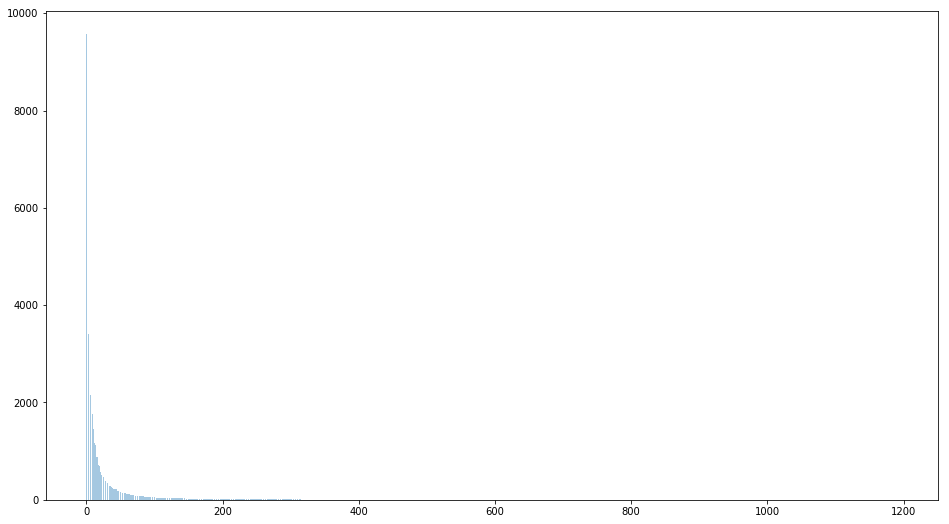

In [34]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.bar(range(stat_exposure_num_distribute.shape[0]),stat_exposure_num_distribute,align='center', alpha=0.4)
plt.show()

In [106]:
#生成测试文件中的广告id（旧的，在曝光日志中出现过的那部分）的曝光日志
index_need_ad_id=totalExposureLog['ad_request_id']==test_sample['ad_id'][0]
print('start!!!!!')
for index,ad_id in enumerate(set(test_sample['ad_id'])):
    index_need_ad_id=index_need_ad_id | (totalExposureLog['ad_request_id']==ad_id)
    print(index)
print('finished!!!!!')
# totalExposureLog[index_need_ad_id].to_csv("../Data/A_preliminary_generate/test_sample_ad_id_ExposureLog.csv",sep=',',index=False,header=None)

## rule 1.1

In [8]:
test_sample.sort_values(by='bid',inplace=True)#初试曝光为0，坡形单调性 和线性分数一模一样！！！
print('sort')
submission_csv=test_sample[['sample_id','ad_id']].copy()
submission_csv['explosion']=0.0
ad_id_dict={}
ad_id_count_dict={}
print('start')
for ad_id in submission_csv['ad_id']:
    ad_id_count_dict[ad_id]=submission_csv[submission_csv['ad_id']==ad_id].shape[0]
for index,ad_id in zip(submission_csv.index,test_sample['ad_id']):
    if (ad_id_dict.get(ad_id,0.0))/0.1<(ad_id_count_dict[ad_id]/2):
        ad_id_dict[ad_id]=ad_id_dict.get(ad_id,0.0)+0.1
    else:
        ad_id_dict[ad_id]=ad_id_dict.get(ad_id,0.0)+0.0001
    submission_csv['explosion'][index]=ad_id_dict[ad_id]
print(submission_csv.head(5))
# submission_csv.drop(columns='ad_id',inplace=True)
# submission_csv.to_csv('submission.csv',header=None,index=None,encoding='utf-8')

sort
start


/home/zhangyier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


       sample_id   ad_id  explosion
20289      20290  536411        0.1
3079        3080  575506        0.1
8622        8623  496615        0.1
15535      15536   66376        0.1
14232      14233  376413        0.1


## rule 1

In [6]:
test_sample.sort_values(by='bid',inplace=True)#初试曝光为0，线形单调性
print('sort')
submission_csv=test_sample[['sample_id']].copy()
submission_csv['explosion']=50.0
ad_id_dict={}
print('start')
for index,ad_id in zip(submission_csv.index,test_sample['ad_id']):
    ad_id_dict[ad_id]=ad_id_dict.get(ad_id,50.0)+0.1
    submission_csv['explosion'][index]=ad_id_dict[ad_id]
print(submission_csv.head(5))
submission_csv.to_csv('submission.csv',header=None,index=None,encoding='utf-8')

sort
start


/home/zhangyier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


       sample_id  explosion
20289      20290       50.1
15535      15536       50.1
14232      14233       50.1
8894        8895       50.1
12020      12021       50.1


In [41]:
del ad_id_dict,submission_csv
gc.collect()

14

## test_sample_ad_id_ExposureLog

In [10]:
test_sample_ad_id_ExposureLog=pd.read_csv("../Data/A_preliminary_generate/test_sample_ad_id_ExposureLog.csv",sep=',',header=None,
                                          names=['ad_request_id','ad_request_time','ad_position','user_id','exposure_ad_id','exposure_ad_size',
                                                 'bid','pctr','quality_ecpm','total_ecpm'])

In [110]:
test_sample_ad_id_ExposureLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 10 columns):
ad_request_id       2033 non-null int64
ad_request_time     2033 non-null int64
ad_position         2033 non-null int64
user_id             2033 non-null int64
exposure_ad_id      2033 non-null int64
exposure_ad_size    2033 non-null int64
bid                 2033 non-null int64
pctr                2033 non-null float64
quality_ecpm        2033 non-null float64
total_ecpm          2033 non-null float64
dtypes: float64(3), int64(7)
memory usage: 158.9 KB


## rule 2
设定历史ad_id（已被曝光）的综合ecpm大于2000的为初始曝光1，并加入线性单调性。

In [43]:
test_sample_ad_id_ExposureLog['ecpm']=test_sample_ad_id_ExposureLog['quality_ecpm']+test_sample_ad_id_ExposureLog['total_ecpm']
test_sample_ecpm=test_sample_ad_id_ExposureLog.groupby(['ad_request_id'])['ecpm'].aggregate(['mean','max','min','median','size']).reset_index()
# test_sample_ecpm[(test_sample_ecpm['size']>1)&(test_sample_ecpm['mean']>2000)]
test_sample_ecpm[(test_sample_ecpm['mean']>500)&(test_sample_ecpm['size']>1)]

#mean>3000 293
#mean>2000 457 下分0.16
# mean>2000 & size>1 97 上分0.03
# mean>1000 & size>2 18
# mean>1000 & size>1 177
# mean>500 & size>1 253

,ad_request_id,mean,max,min,median,size
2,474,3395.386667,4829.920,2029.080,3327.1600,3
7,2490,647.164000,1089.280,205.048,647.1640,2
18,6532,1324.260000,1566.120,1082.400,1324.2600,2
19,6560,2410.200000,2410.200,2410.200,2410.2000,2
20,8106,713.360000,762.320,664.400,713.3600,2
21,8614,978.760000,1175.720,781.800,978.7600,2
28,10167,600.200000,729.800,470.600,600.2000,2
39,16923,4753.105500,6702.795,2803.416,4753.1055,2
40,17667,5069.426667,7308.200,591.880,7308.2000,3
41,18266,1795.331500,2798.120,792.543,1795.3315,2


In [46]:
test_sample.sort_values(by='bid',inplace=True)
print('sort')
submission_csv=test_sample[['sample_id']].copy()
submission_csv['explosion']=0.0
ad_id_dict={}
test_sample_ecpm_biger_1000=test_sample_ecpm['ad_request_id'][(test_sample_ecpm['size']>1)&(test_sample_ecpm['mean']>1000)]
for index,ad_id in zip(test_sample_ecpm_biger_1000.index,test_sample_ecpm_biger_1000):
    ad_id_dict[ad_id]=test_sample_ecpm['size'].iloc[index]
for index,ad_id in zip(submission_csv.index,test_sample['ad_id']):
    ad_id_dict[ad_id]=ad_id_dict.get(ad_id,0.0)+0.1
    submission_csv['explosion'][index]=ad_id_dict[ad_id]
print(submission_csv.head(5))
submission_csv.to_csv('submission.csv',header=None,index=None,encoding='utf-8')

sort


/home/zhangyier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


       sample_id  explosion
20289      20290        0.1
13901      13902        0.1
19768      19769        0.1
10588      10589        0.1
18485      18486        2.1


In [47]:
submission_csv[submission_csv['explosion']>1].shape

(2520, 2)

In [18]:
print(seconds2Datetime(test_sample_ad_id_ExposureLog['ad_request_time'].min()),
      seconds2Datetime(test_sample_ad_id_ExposureLog['ad_request_time'].max()))
print(seconds2Datetime(1550750744))

2019-02-17 00:18:32 2019-03-19 23:02:49
2019-02-21 20:05:44


In [15]:
ad_id_history_explose_series=pd.value_counts(test_sample_ad_id_ExposureLog['ad_request_id'])
print(ad_id_history_explose_series)
# ad_id_dict={}
# for index,exposure_times in zip(ad_id_history_explose_series.index,ad_id_history_explose_series):
#     if exposure_times>1:
#         ad_id_dict[index]=exposure_times-0.1
#     else:
#         ad_id_dict[index]=-0.1
# ad_id_history_explose_series[ad_id_history_explose_series<=1].shape

292956    8
663281    6
133580    5
632376    4
519499    4
17667     3
664928    3
659092    3
544053    3
6071      3
520713    3
213259    3
572821    3
329426    3
701464    3
456517    3
173009    3
401238    3
474       3
220029    3
359448    3
447948    3
77176     3
246194    2
649554    2
236557    2
308639    2
254433    2
174817    2
614737    2
         ..
608838    1
315981    1
613485    1
468292    1
688727    1
479835    1
615005    1
270949    1
547045    1
570020    1
84504     1
457234    1
221647    1
80336     1
162264    1
377307    1
391648    1
500193    1
688611    1
199142    1
410091    1
379376    1
313844    1
250361    1
580090    1
154110    1
141826    1
545293    1
535056    1
671744    1
Name: ad_request_id, Length: 1609, dtype: int64


In [17]:
print(ad_id_history_explose_series[ad_id_history_explose_series==1].shape,ad_id_history_explose_series.shape)

(1220,) (1609,)


In [44]:
test_sample_ad_id_ExposureLog[test_sample_ad_id_ExposureLog['ad_request_id']==292956]

,ad_request_id,ad_request_time,ad_position,user_id,exposure_ad_id,exposure_ad_size,bid,pctr,quality_ecpm,total_ecpm
1074,292956,1551766001,142,906420,649318,36,84,14.002,280.04,1456.04
1090,292956,1551766001,123,906420,651677,36,82,21.157,423.14,2157.14
1093,292956,1551766001,142,906420,227043,36,4,86.393,1727.86,2072.86
1095,292956,1551766001,142,906420,262802,64,93,12.280,245.60,1387.64
1099,292956,1551766001,30,906420,349639,36,224,20.282,405.64,4948.64
1120,292956,1551766001,228,906420,221491,64,143,9.351,187.02,1524.02
1125,292956,1551766001,142,906420,173335,64,80,13.630,272.60,1362.60
1136,292956,1551766001,142,906420,523470,36,143,8.369,167.38,1363.38


In [45]:
test_sample[test_sample['ad_id']==292956]

,sample_id,ad_id,create_time,ad_size,ad_trades_id,commodity_type,commodity_id,ad_account_id,when_ad_put,audience_targeting,bid
3931,3932,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,20
19236,19237,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,40
6147,6148,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,60
11429,11430,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,80
18384,18385,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,100
16696,16697,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,120
2903,2904,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,140
16701,16702,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,160
12382,12383,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,180
10850,10851,292956,1551923567,30,122,13,28092,14777,"17592185782272,17592185782272,17592185782272,1...",area:11442,200


## test_sample_ad_id_ad_static_feature

In [7]:
test_sample_ad_id_ad_static_feature=pd.read_csv("../Data/A_preliminary_generate/test_sample_ad_id_ad_static_feature.csv",sep='\t',header=None,
                                names=['ad_id','create_time','ad_account_id','commodity_id','commodity_type','ad_trades_id','ad_size',
                             ])

In [ ]:
print(datetime2SecondsFrom1970('2019-03-19 23:59:59'))
print(seconds2Datetime(test_sample_ad_id_ad_static_feature['create_time'].min()))
test_sample_ad_id_ad_static_feature[test_sample_ad_id_ad_static_feature['create_time']<1553011199.0]
test_sample_ad_id_ad_static_feature[test_sample_ad_id_ad_static_feature['ad_id']==292956]

## test_sample_ad_id_ad_operation

In [69]:
test_sample_ad_id_ad_operation=pd.read_csv("../Data/A_preliminary_generate/test_sample_ad_id_ad_operation.csv",sep='\t',
                                           header=None,names=['ad_id','create_time','operation_type','alter_field','value_alter'])

In [71]:
test_sample_ad_id_ad_operation[test_sample_ad_id_ad_operation['ad_id']==326853]

,ad_id,create_time,operation_type,alter_field,value_alter
22226,326853,0,1,1,0


In [78]:
pd.value_counts(pd.value_counts(test_sample_ad_id_ad_operation['ad_id']))

4      196
8      165
6      164
10      91
5       72
7       66
12      60
3       58
1       54
9       53
11      50
14      44
13      43
15      35
17      34
21      27
16      24
20      22
18      20
19      19
23      17
27      16
26      15
34      14
22      13
24      13
25      13
29      13
31      12
33      12
      ... 
52       5
36       4
40       4
45       4
46       4
56       4
51       4
53       3
50       3
63       2
69       2
67       2
60       2
72       2
61       2
55       2
58       2
57       2
49       2
48       2
59       1
62       1
101      1
65       1
66       1
47       1
73       1
76       1
83       1
173      1
Name: ad_id, Length: 72, dtype: int64

In [ ]:
test_sample_ad_id_ad_operation[test_sample_ad_id_ad_operation['ad_id']==292956]
start_time=test_sample_ad_id_ad_operation['create_time'].min()
end_time=test_sample_ad_id_ad_operation['create_time'].max()
print(start_time,end_time)
test_sample_ad_id_ad_operation[test_sample_ad_id_ad_operation['alter_field']==1]
test_sample_ad_id_ad_operation[test_sample_ad_id_ad_operation['operation_type']==2].shape